<h1>
Are there noticeable differences in attitudes towards mental health discussions at work across different industries or countries?
</h1>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 200)
df = pd.read_csv("./Data/combined2.csv")
#Questions used
print(len([3, 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 83, 85, 86, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 117, 118])) 

C:\Users\samir\AppData\Local\Temp\ipykernel_17556\989892296.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


80


In [5]:
from IPython.display import display
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 200)
df = pd.read_csv("./Data/cleanData.csv")

[3, 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 83, 85, 86, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 117, 118]
question_ids = [3, 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 83, 85, 86, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 117, 118]

#unique_question_texts = df[df['QuestionID'].isin(question_ids)]['questiontext'].unique()
#display(unique_question_texts)
unique_question_texts = df[df['QuestionID'].isin(question_ids)]['questiontext'].unique()
table_df = pd.DataFrame(unique_question_texts[:85], columns=['Question Text'])
display(table_df)



,Question Text
0,What country do you live in?
1,Have you ever sought treatment for a mental health disorder from a mental health professional?
2,Does your employer provide mental health benefits as part of healthcare coverage?
3,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
4,Would you bring up a mental health issue with a potential employer in an interview?
5,Do you feel that your employer takes mental health as seriously as physical health?
6,"If you have a mental health condition, do you feel that it interferes with your work?"
7,Do you work remotely (outside of an office) at least 50% of the time?
8,Do you know the options for mental health care your employer provides?
9,Has your employer ever discussed mental health as part of an employee wellness program?


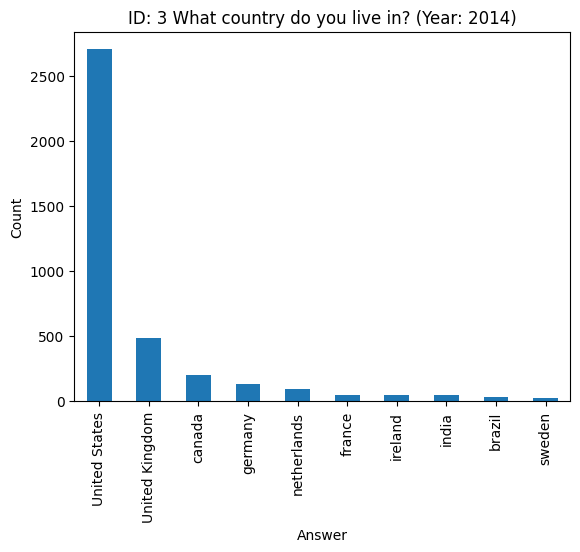

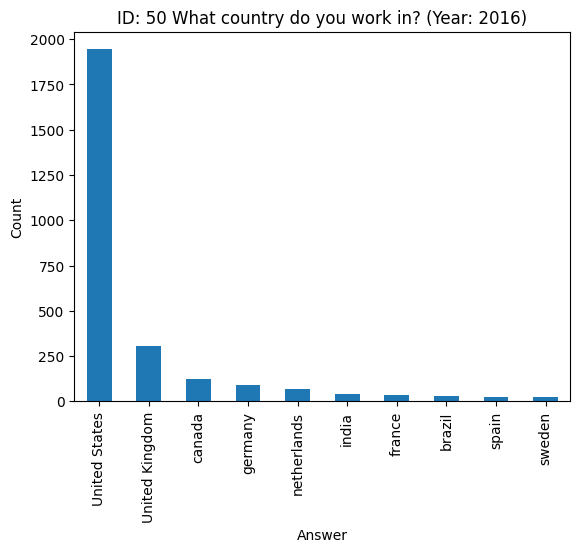

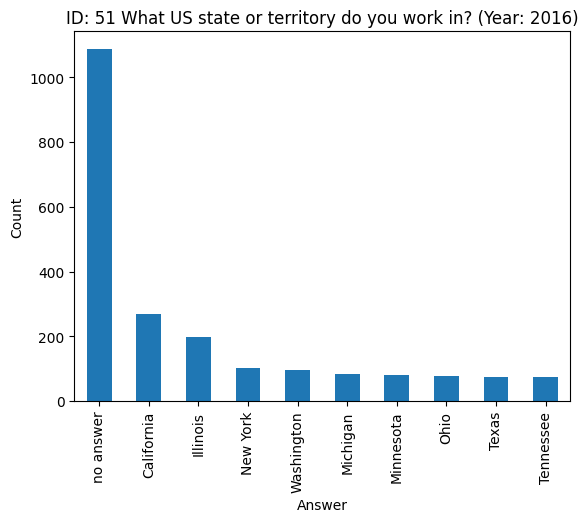

In [20]:
normalization_mapping = {
    'USA': 'United States',
    'U.S.A': 'United States',
    'united states': 'United States',
    'United states:': 'United States',
    'America': 'United States',
    '-1': 'Unknown',  # Treating '-1' as unknown or unspecified
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'England': 'United Kingdom',  # Assuming 'England' should be grouped under 'United Kingdom'
    'Other': 'Unknown' , # Optionally grouping 'Other' as 'Unknown'
    'Male' : 'male',
    'Female': 'female',
    '1': 'Yes(1)',
    '0': 'No(0)'
}
top_n = 10
for question_id in [3, 50, 51]:
        df['AnswerText'] = df['AnswerText'].replace(normalization_mapping)
        df[df['QuestionID'] == question_id]['AnswerText'].value_counts().nlargest(top_n).plot(kind='bar')
        question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
        year = df[df['QuestionID'] == question_id]['SurveyID'].iloc[0]
        plt.xlabel('Answer')
        plt.ylabel('Count')
        plt.title("ID: " + str(question_id) + " " + question_text + " (Year: " + str(year) + ")")
        plt.show()

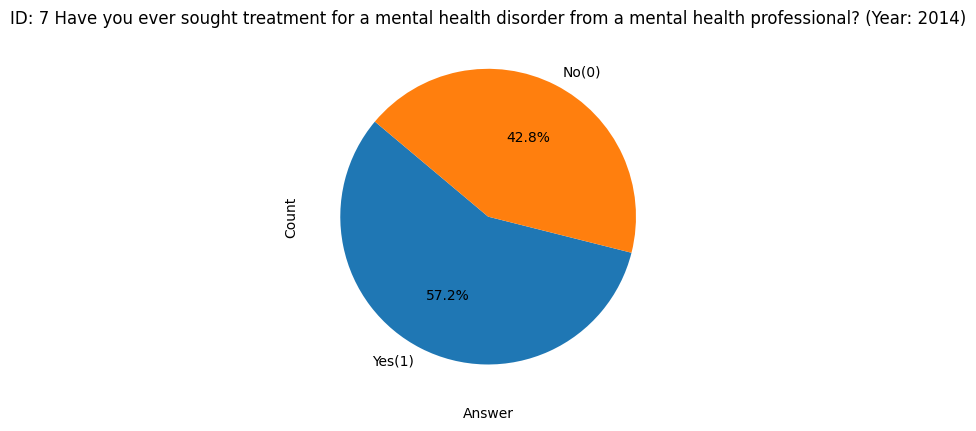

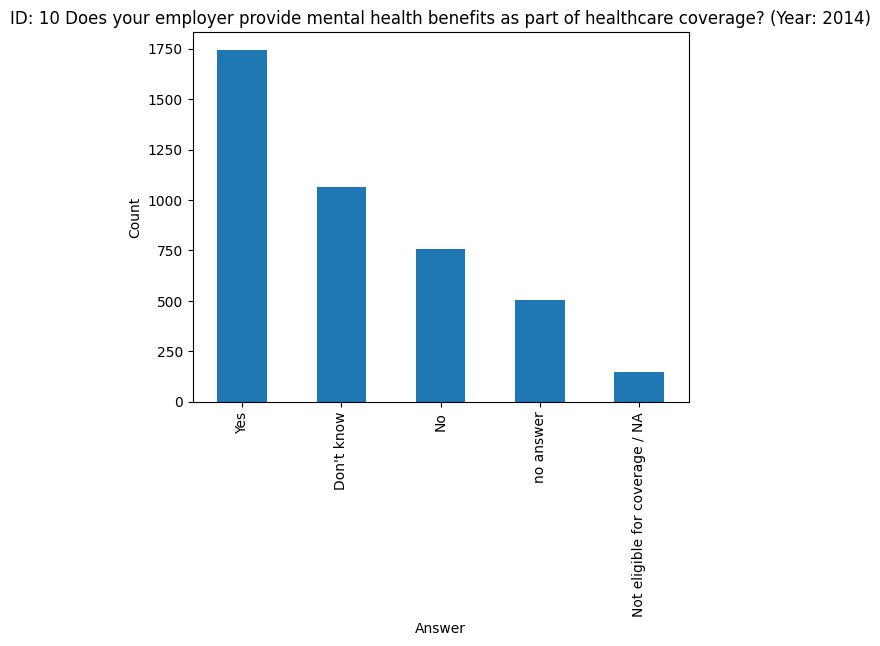

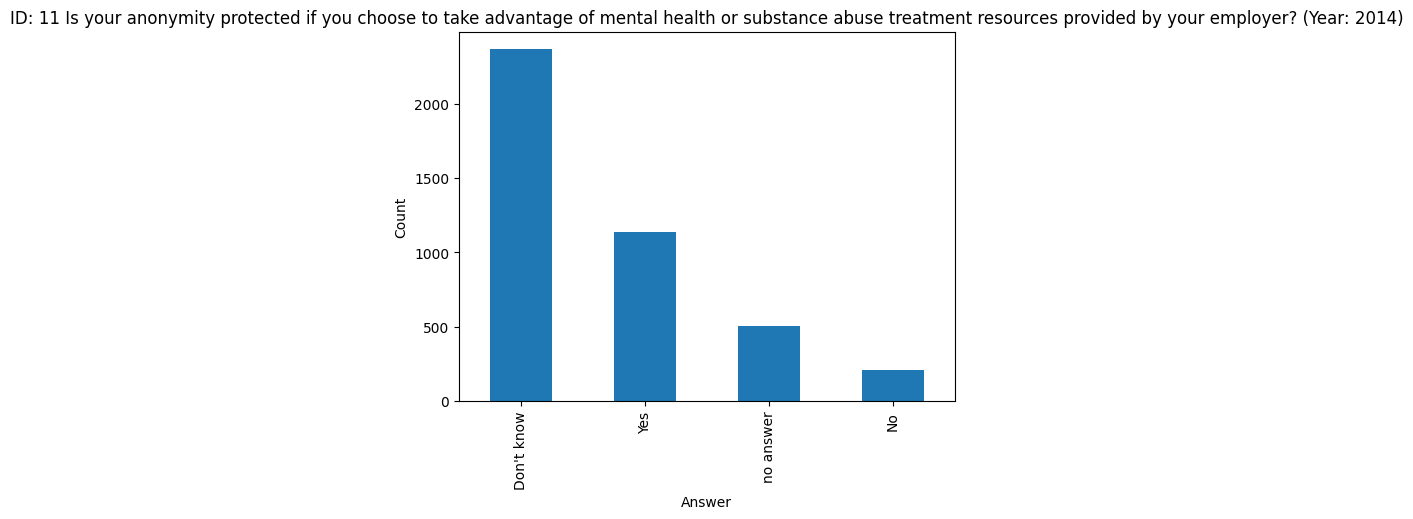

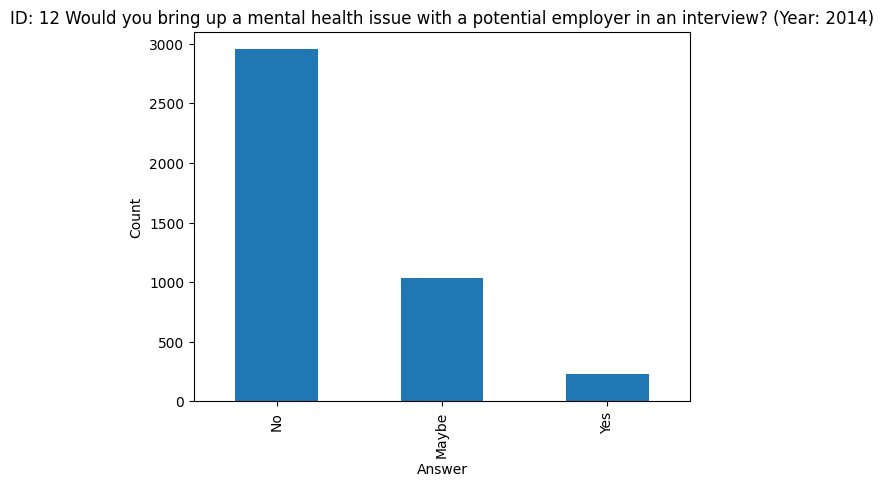

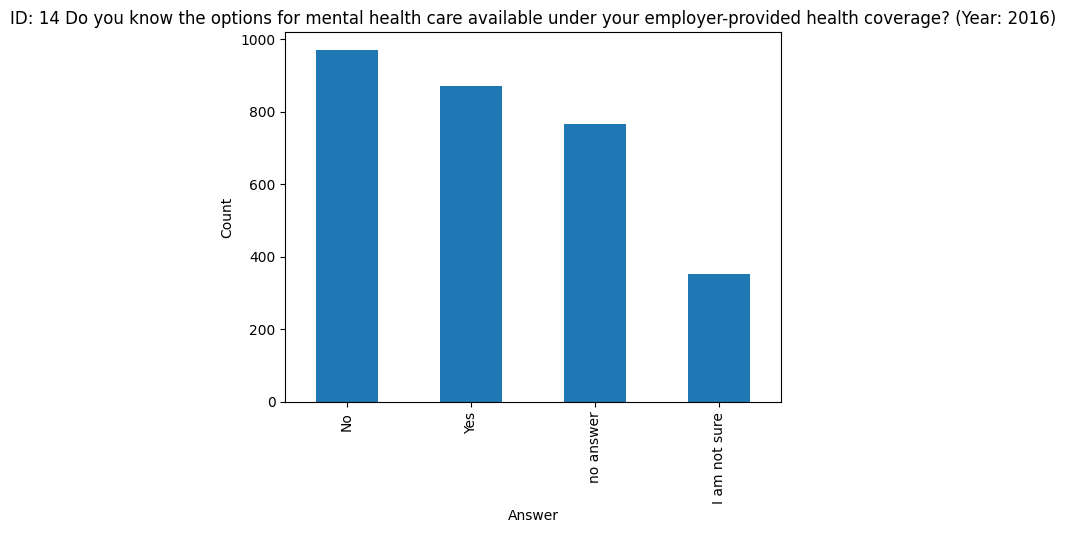

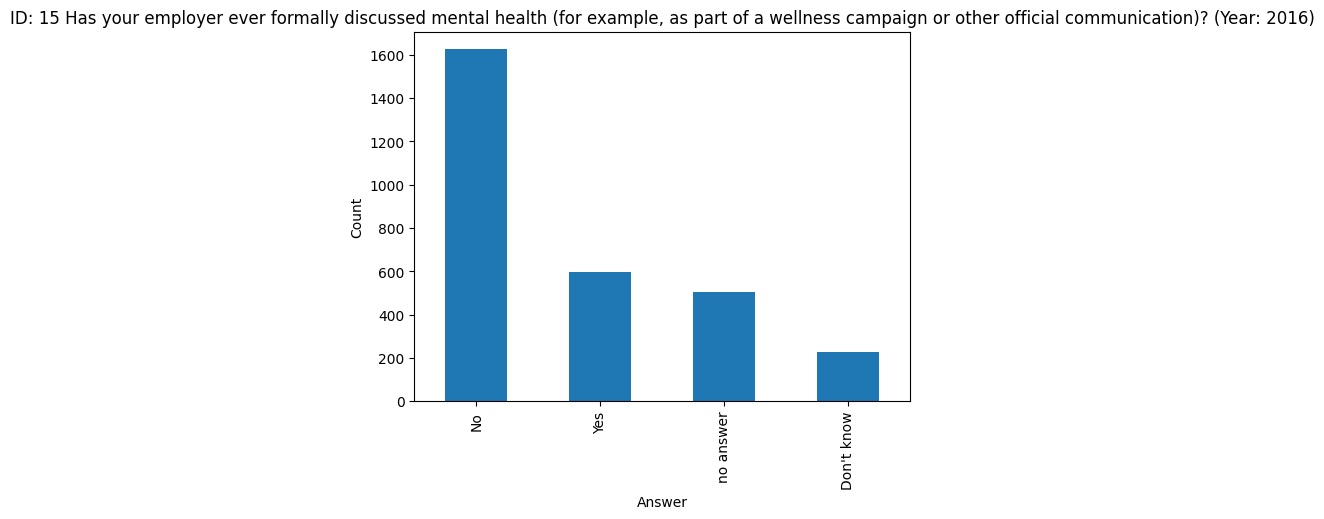

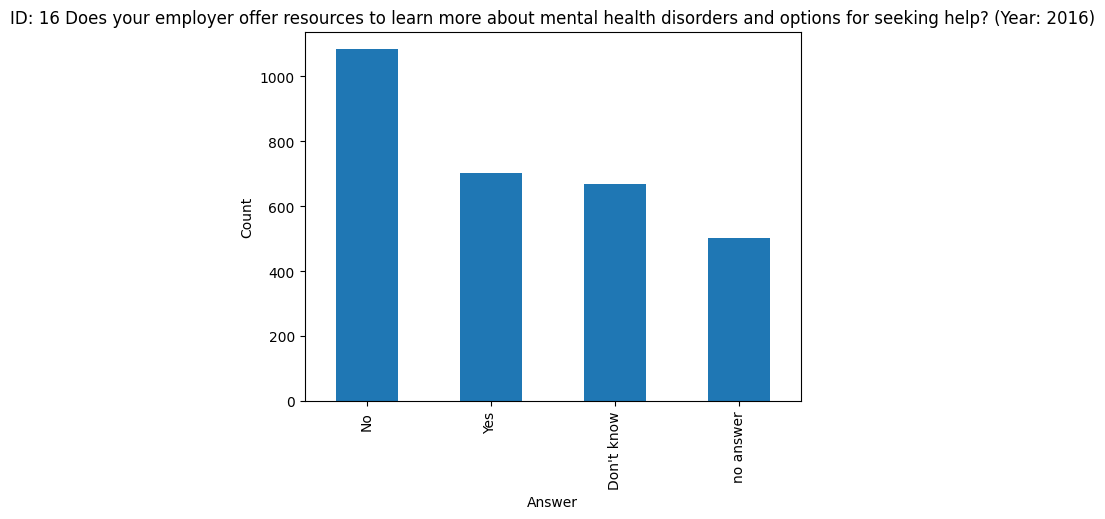

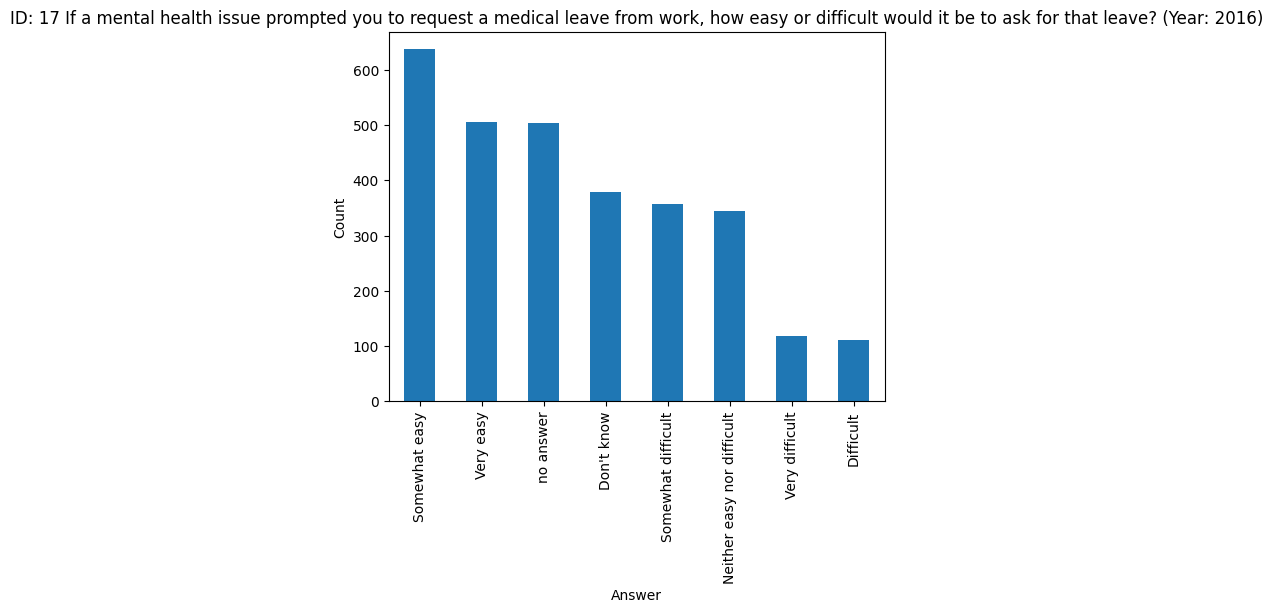

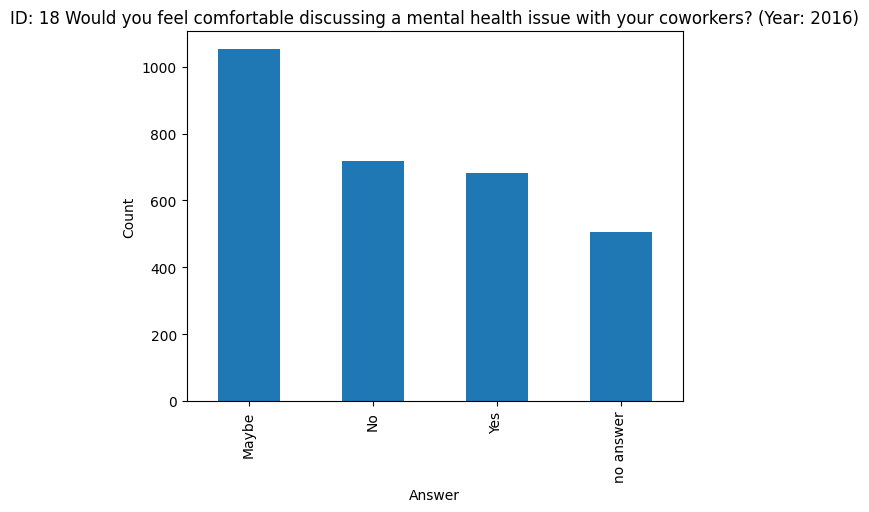

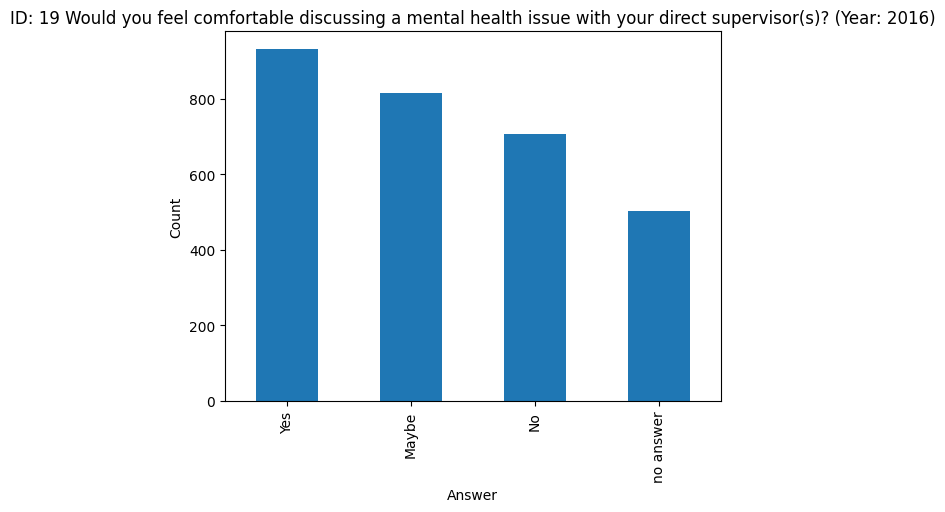

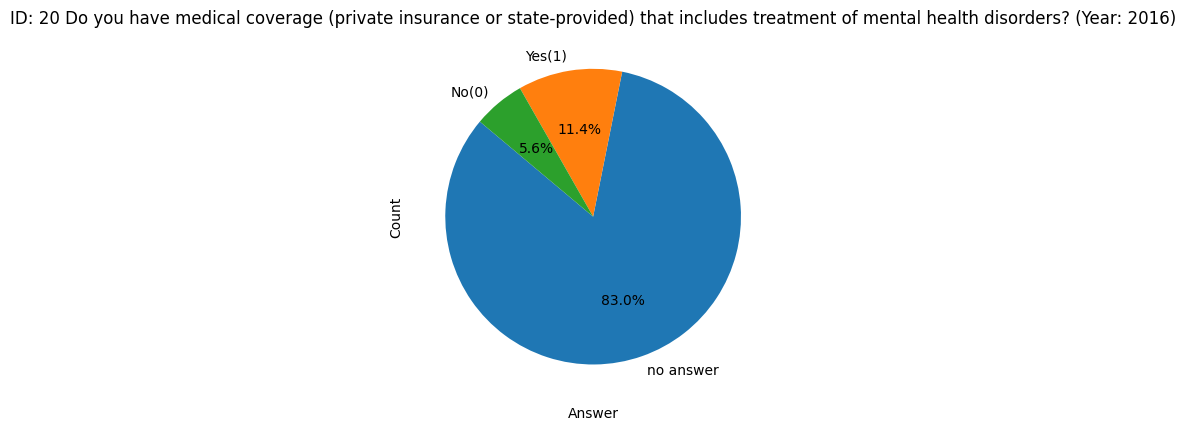

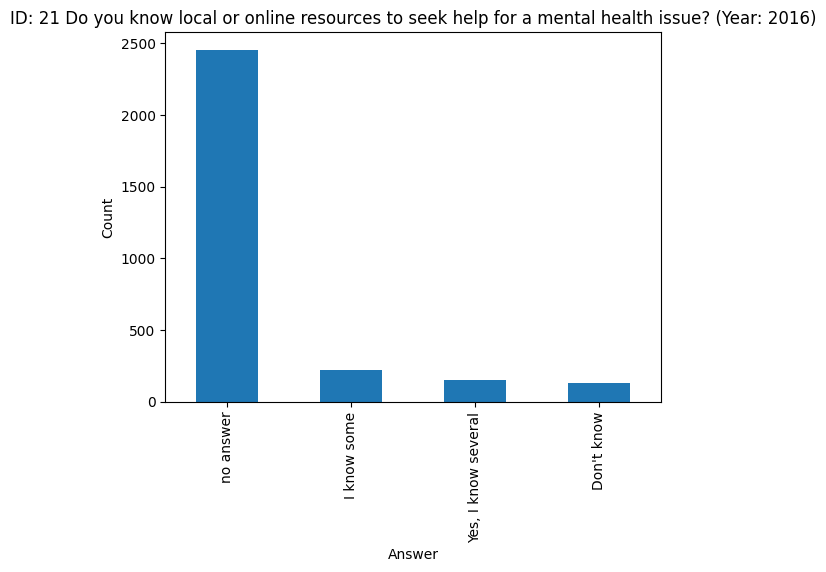

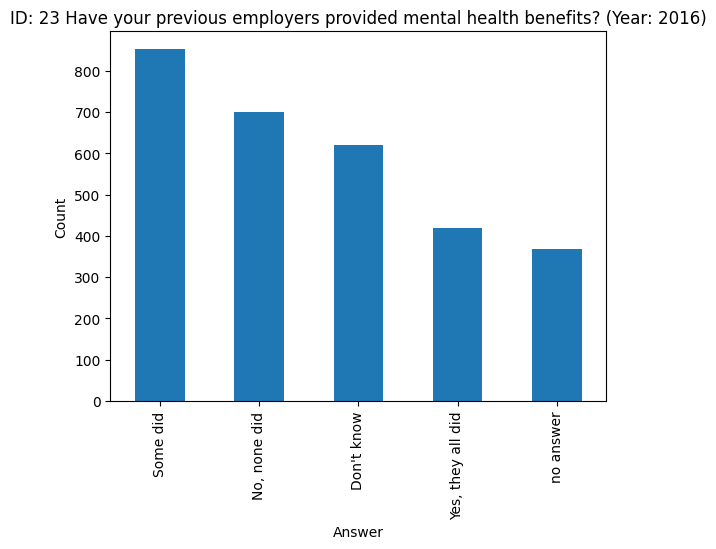

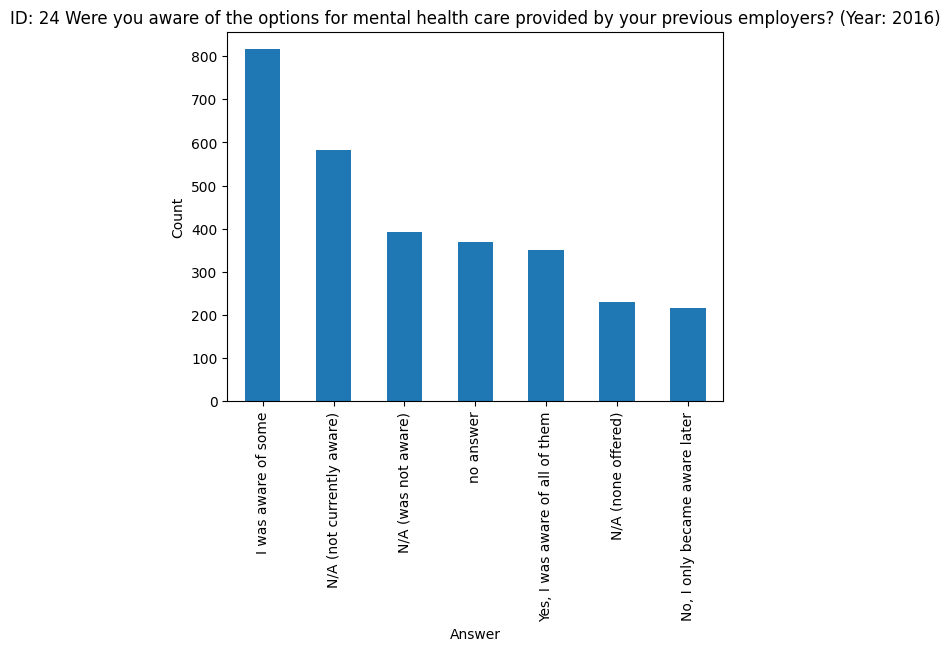

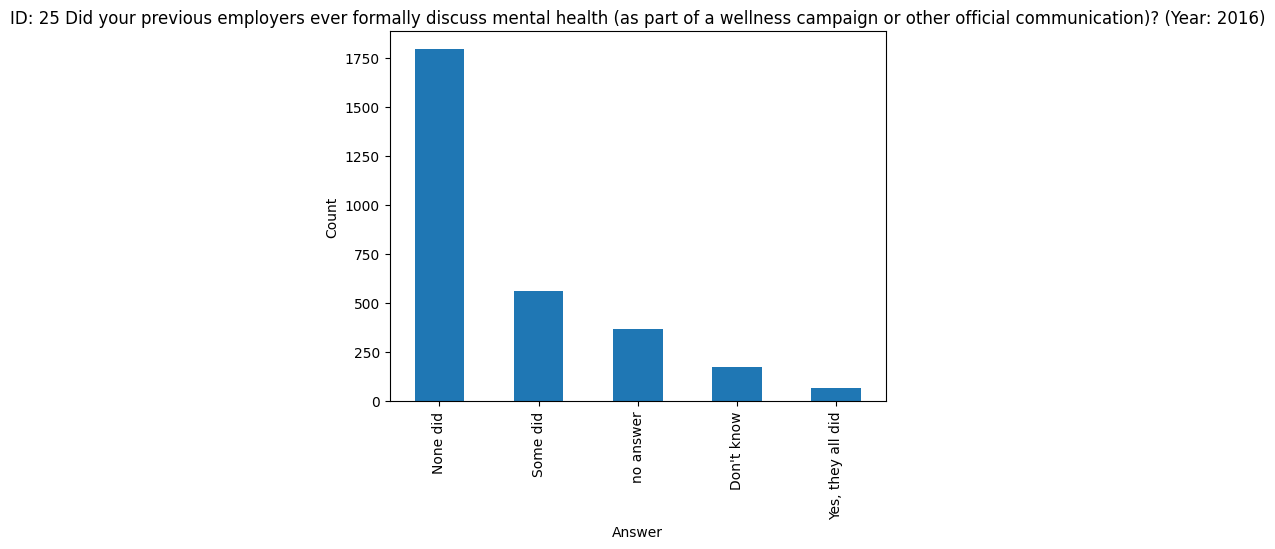

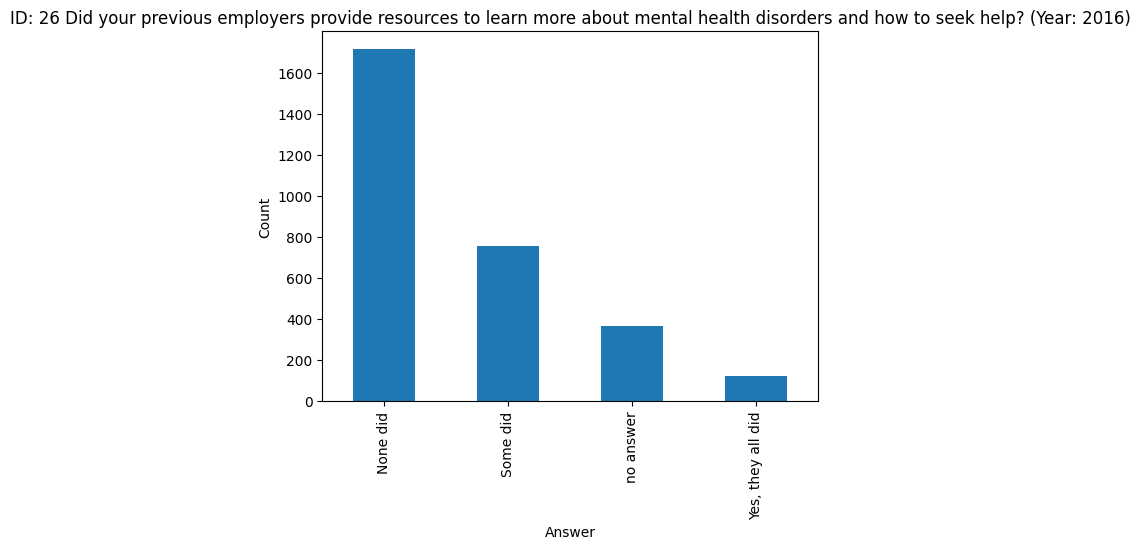

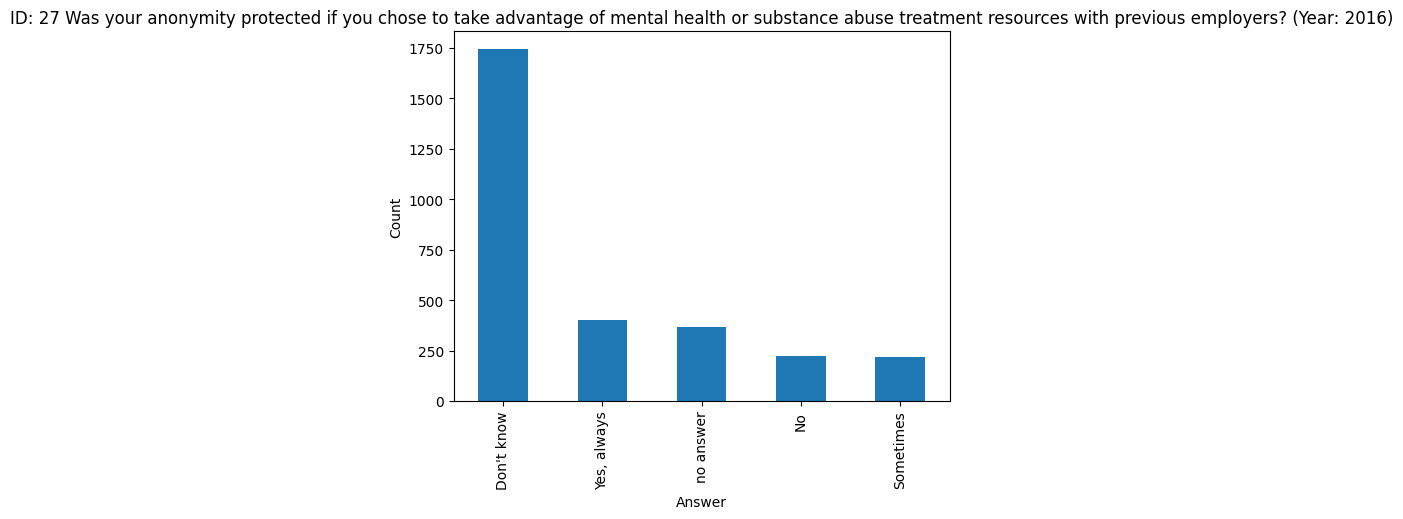

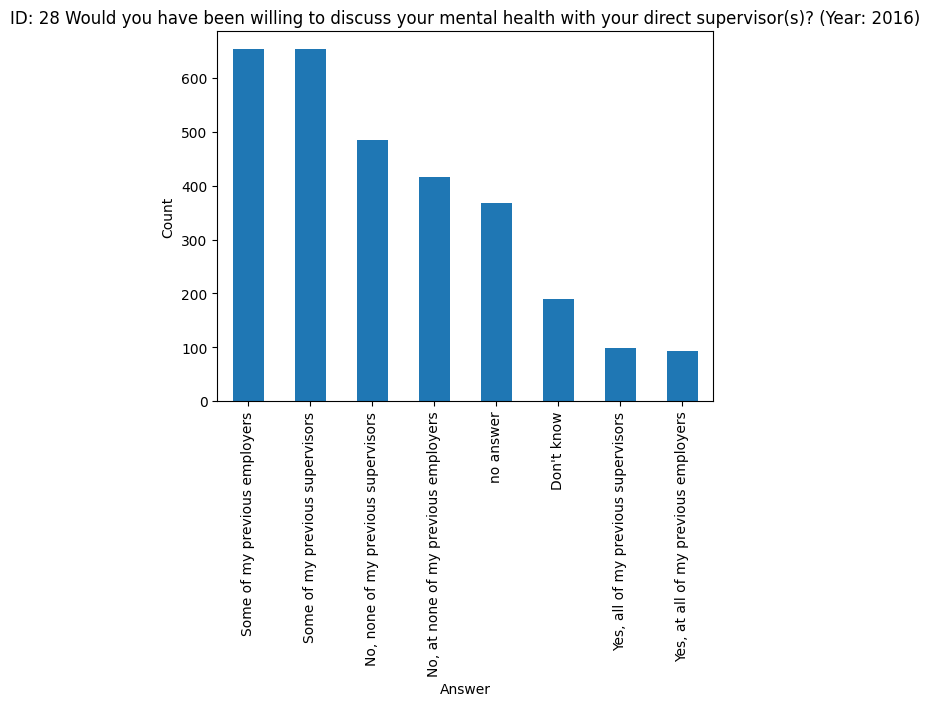

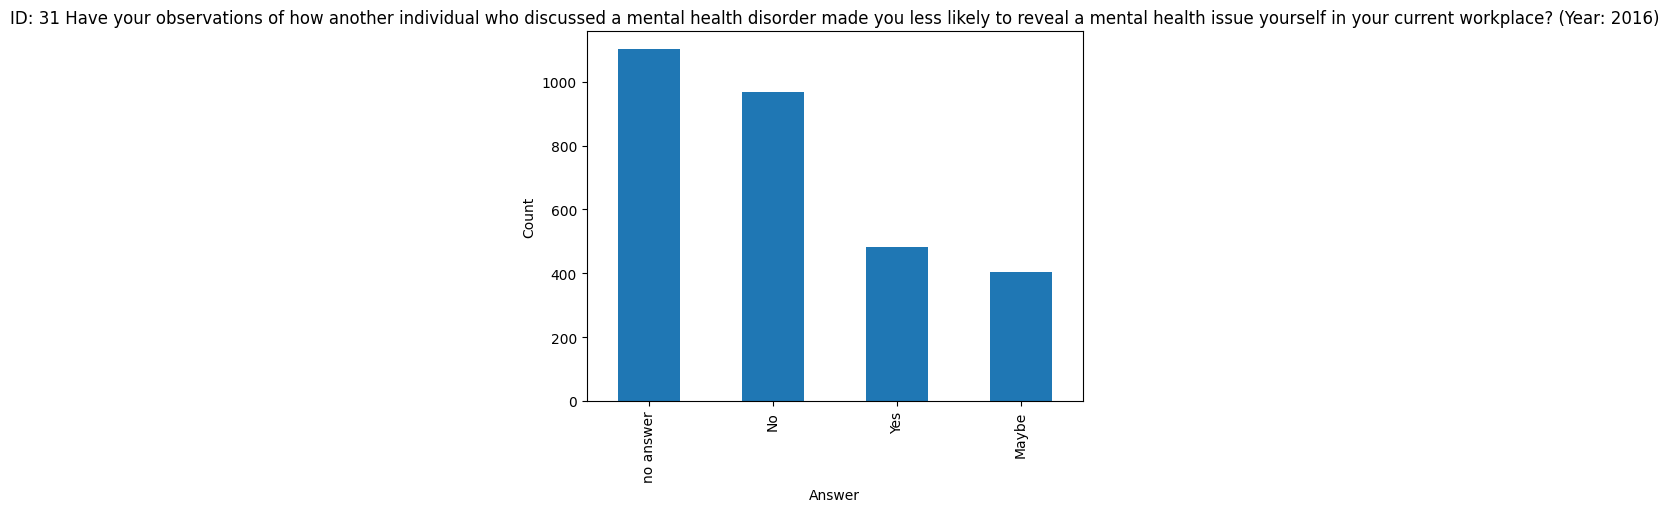

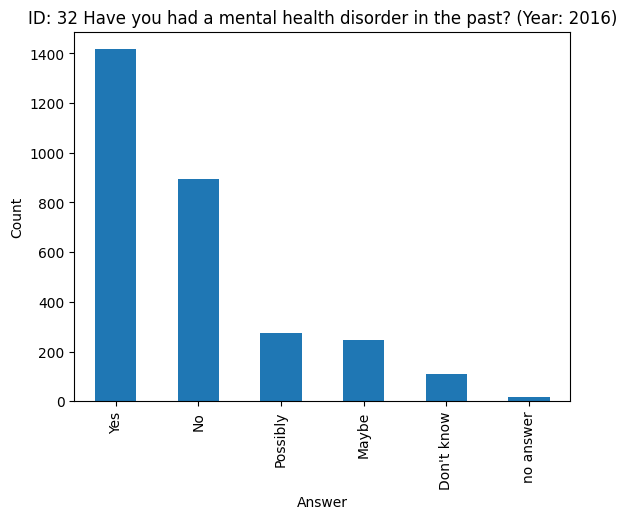

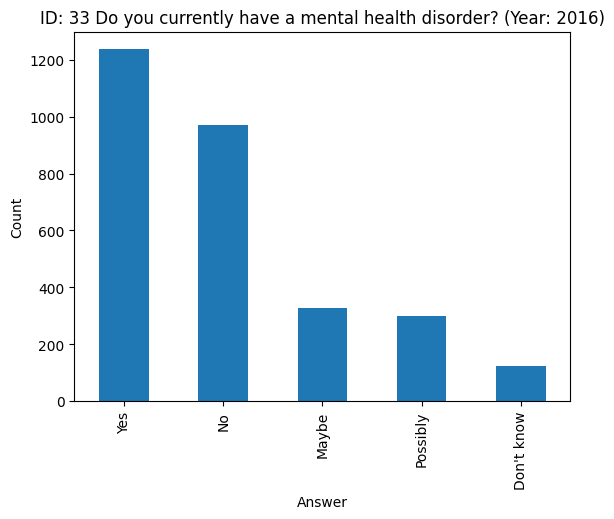

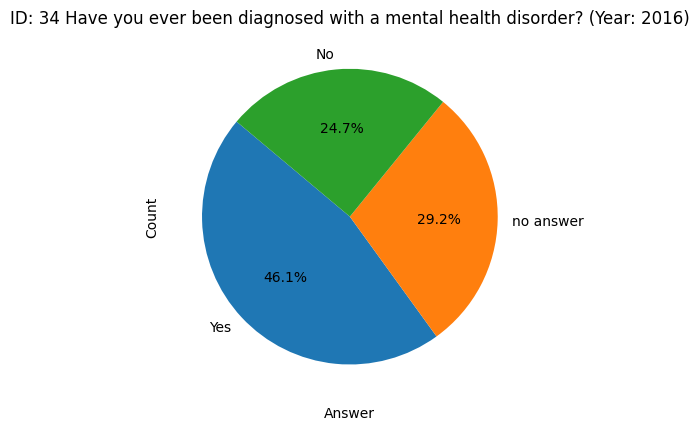

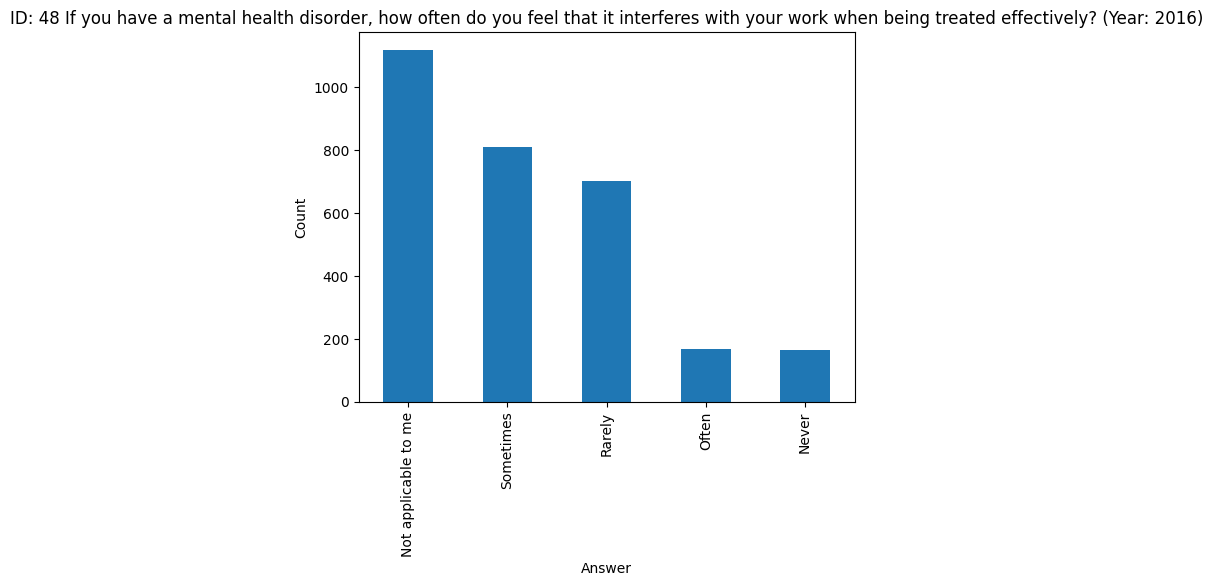

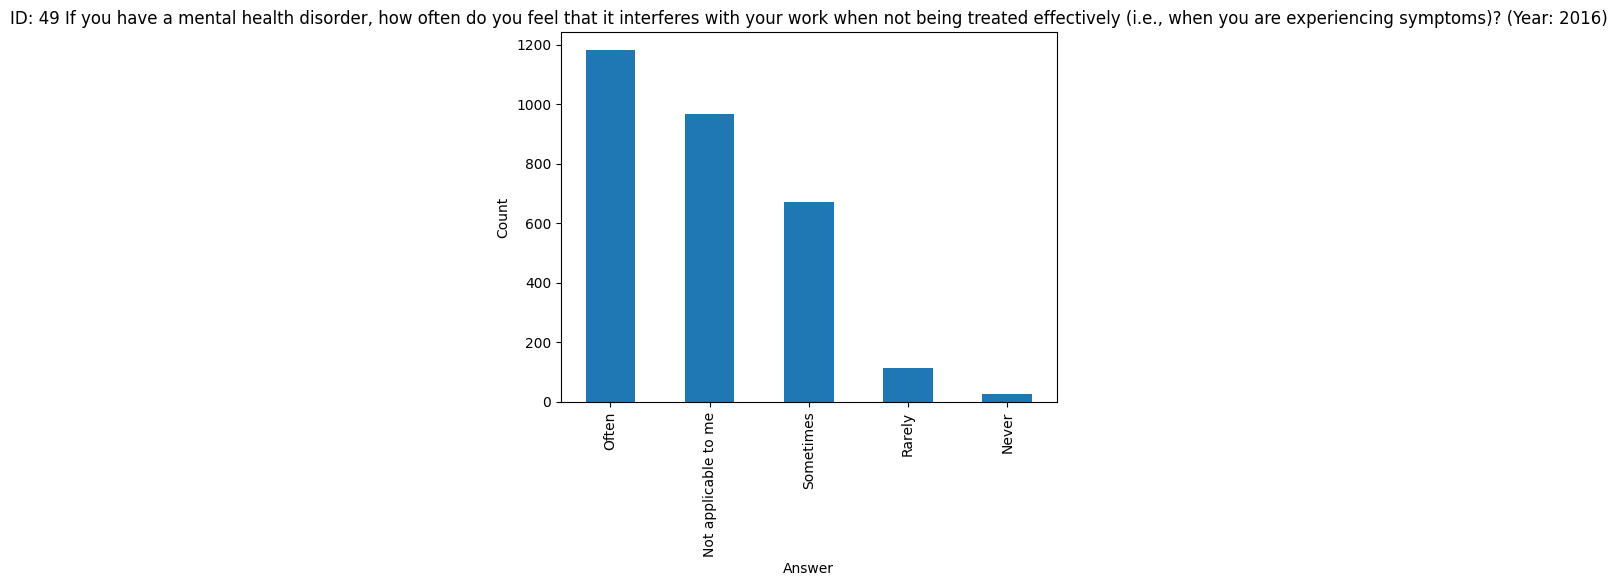

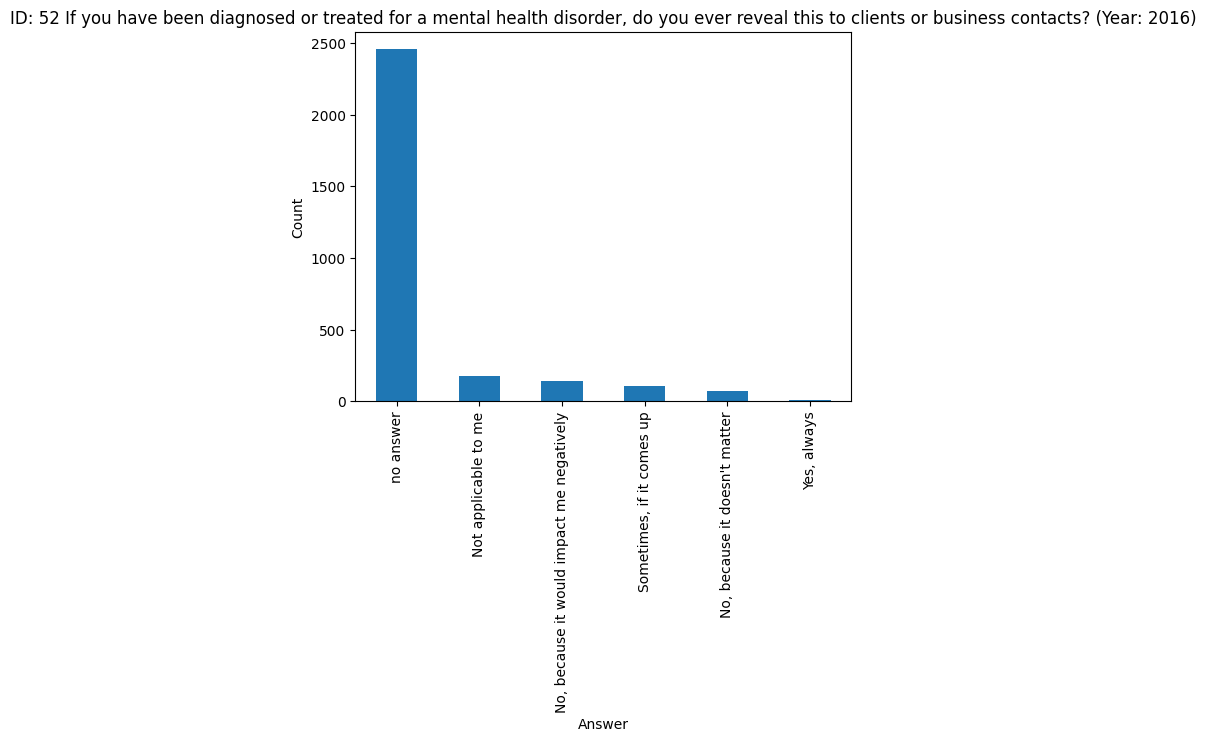

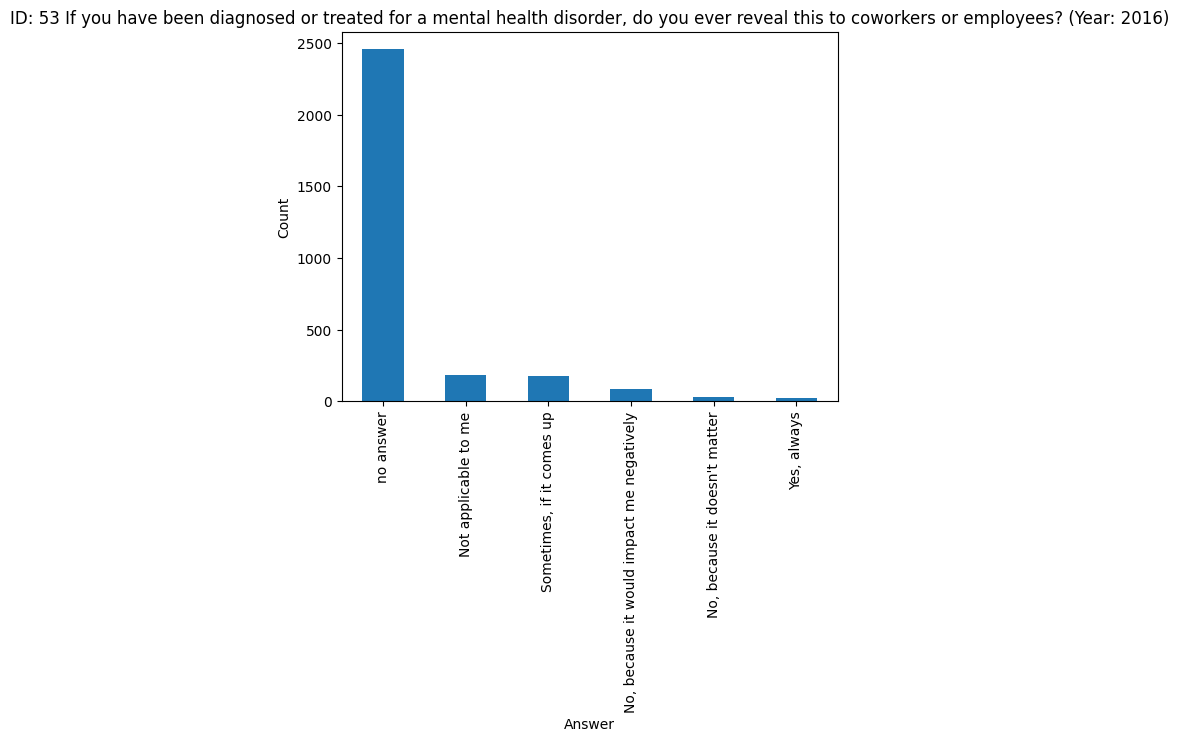

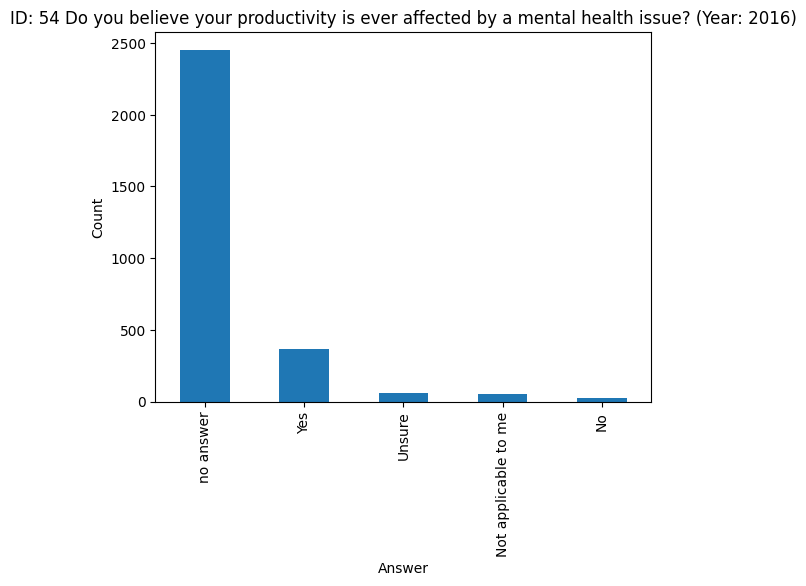

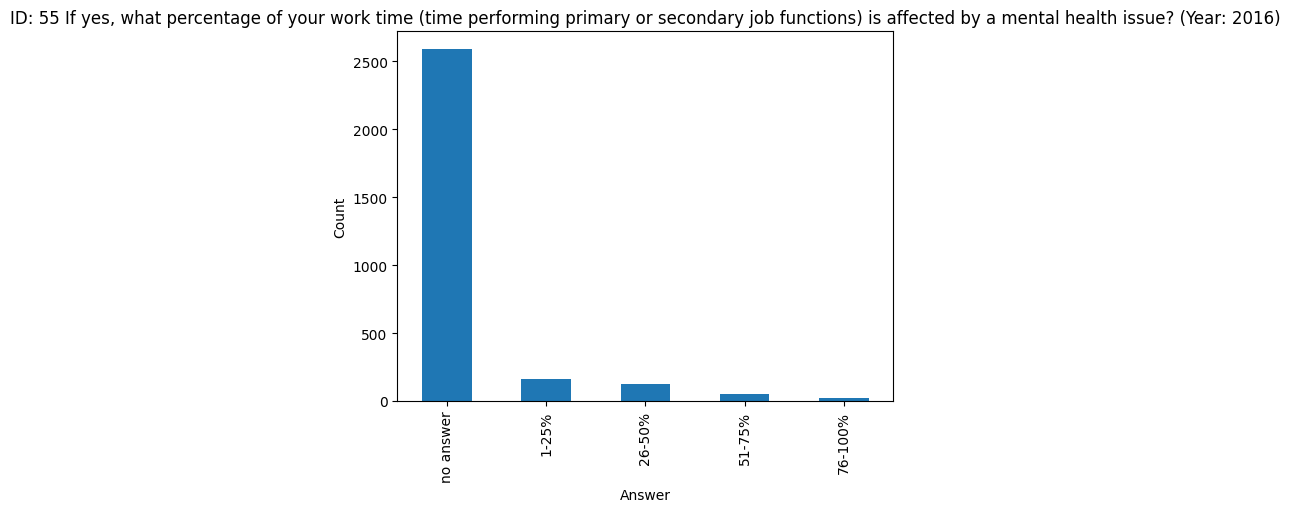

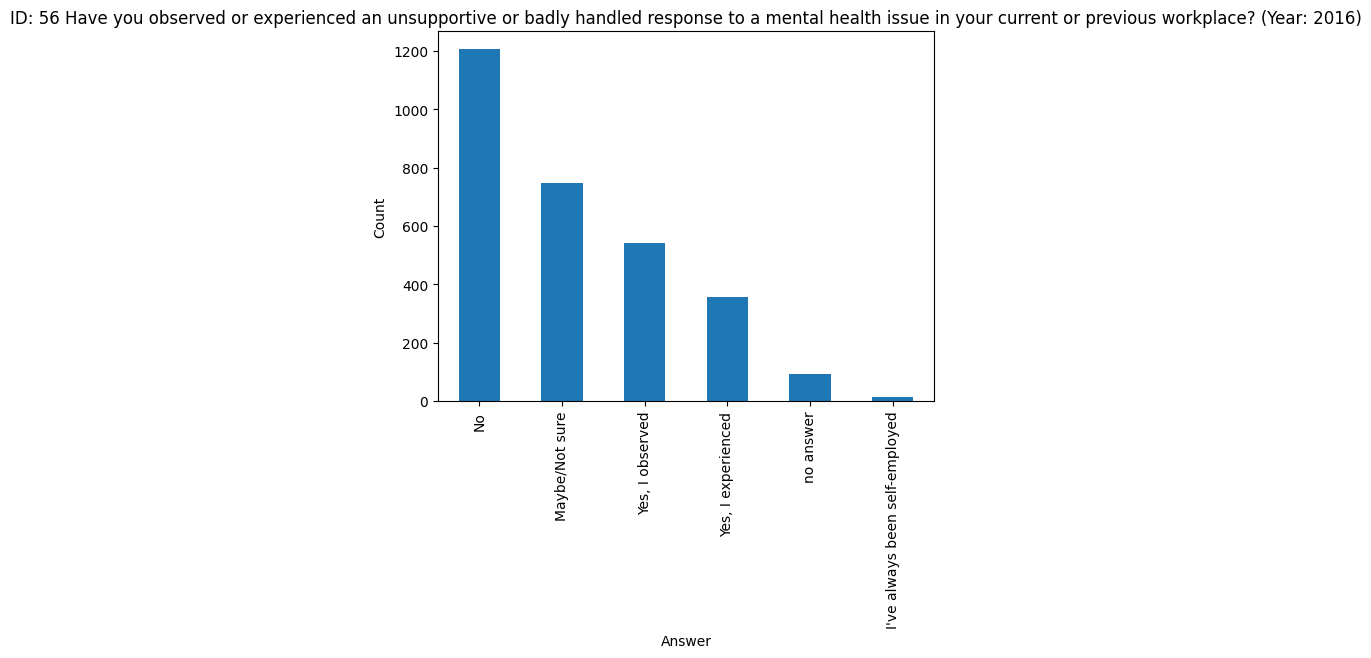

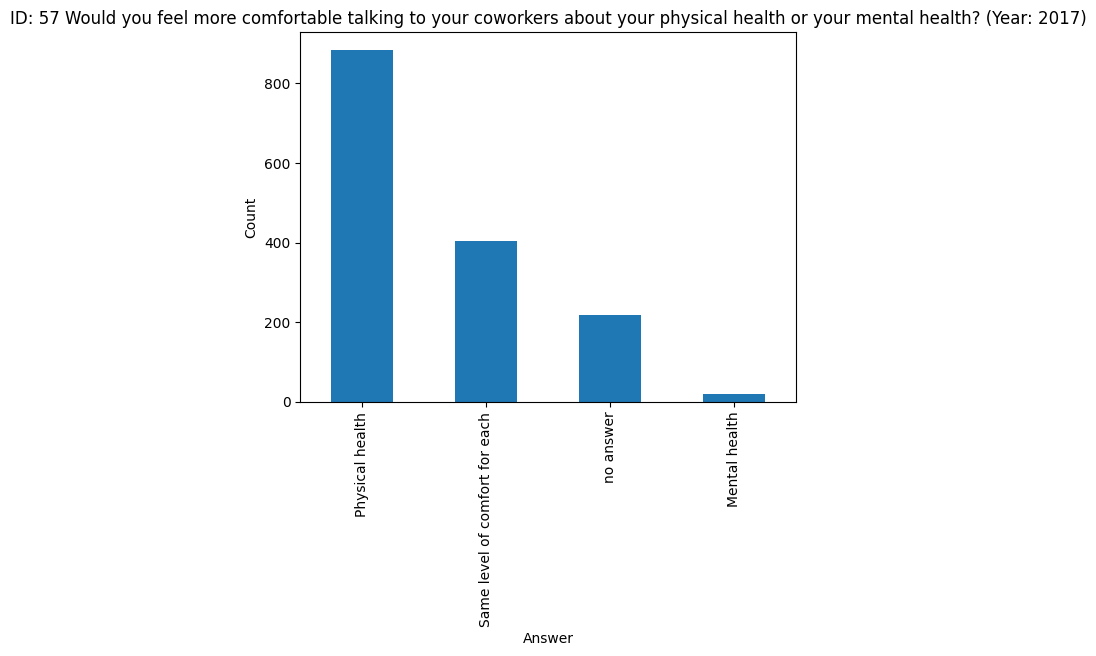

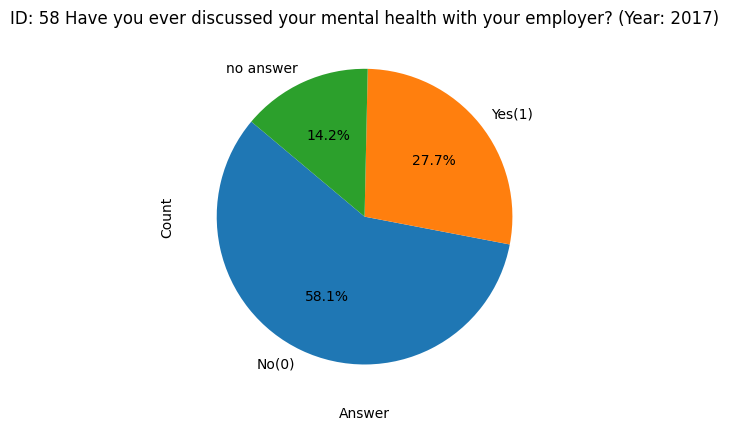

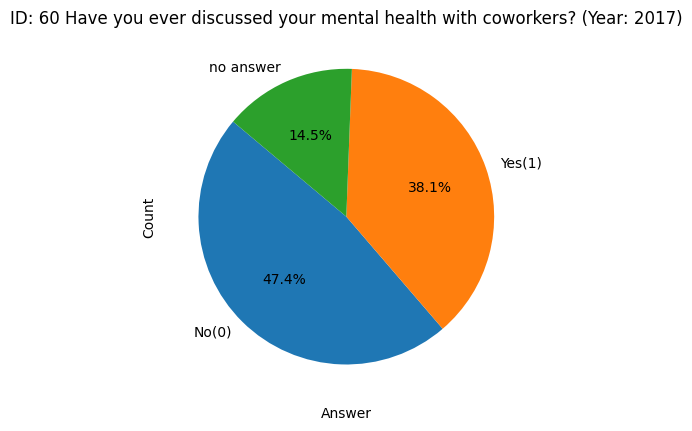

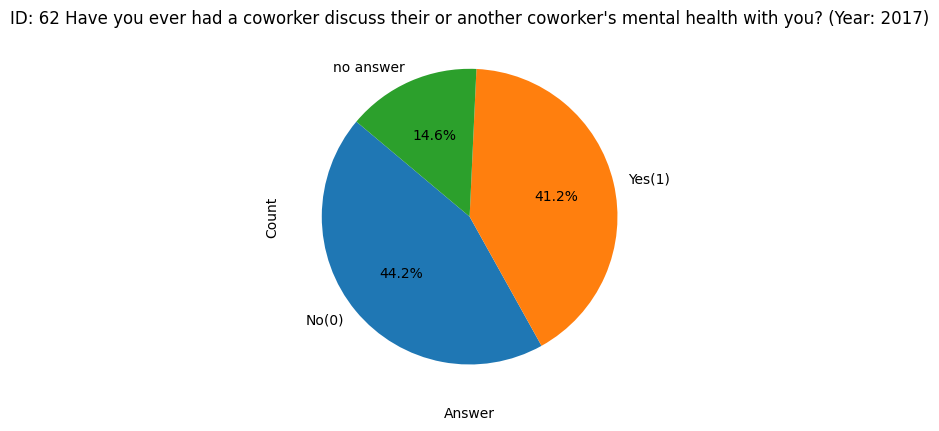

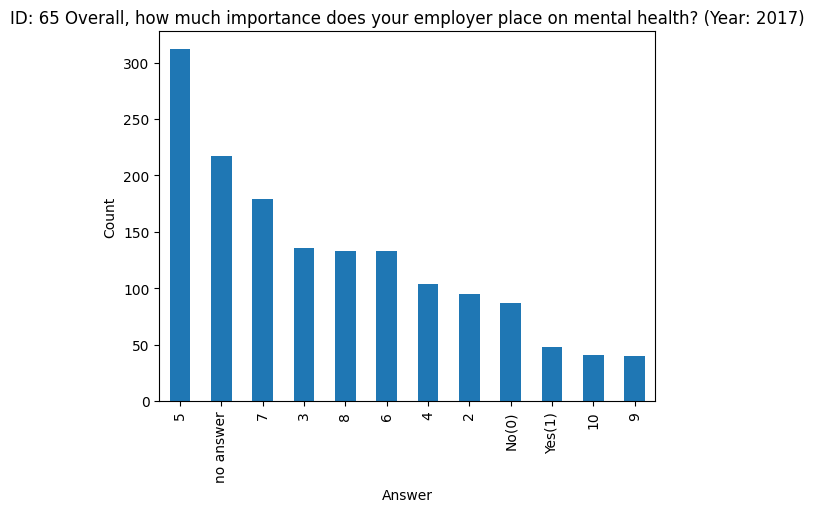

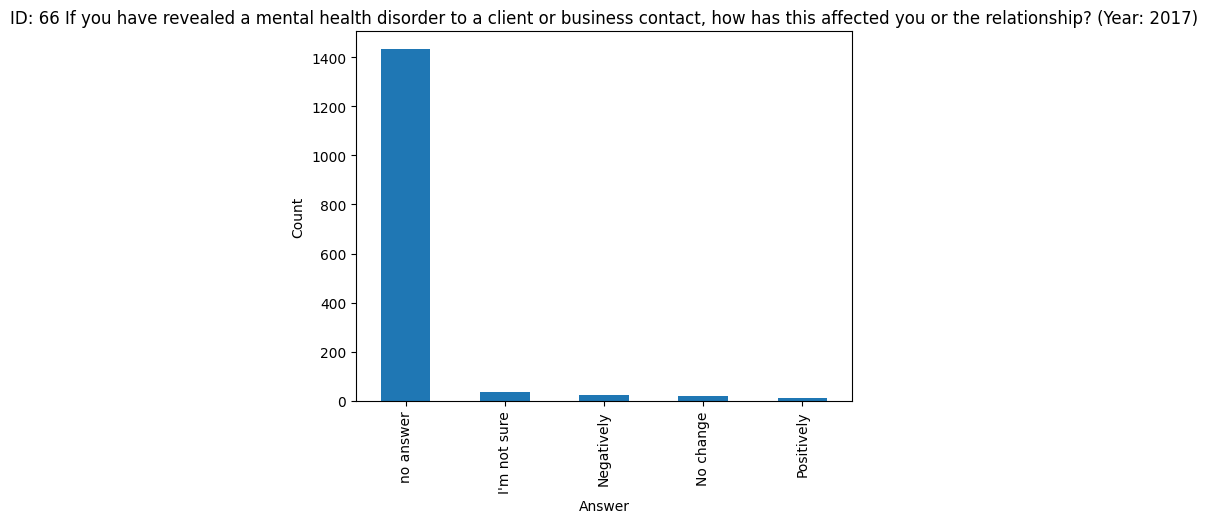

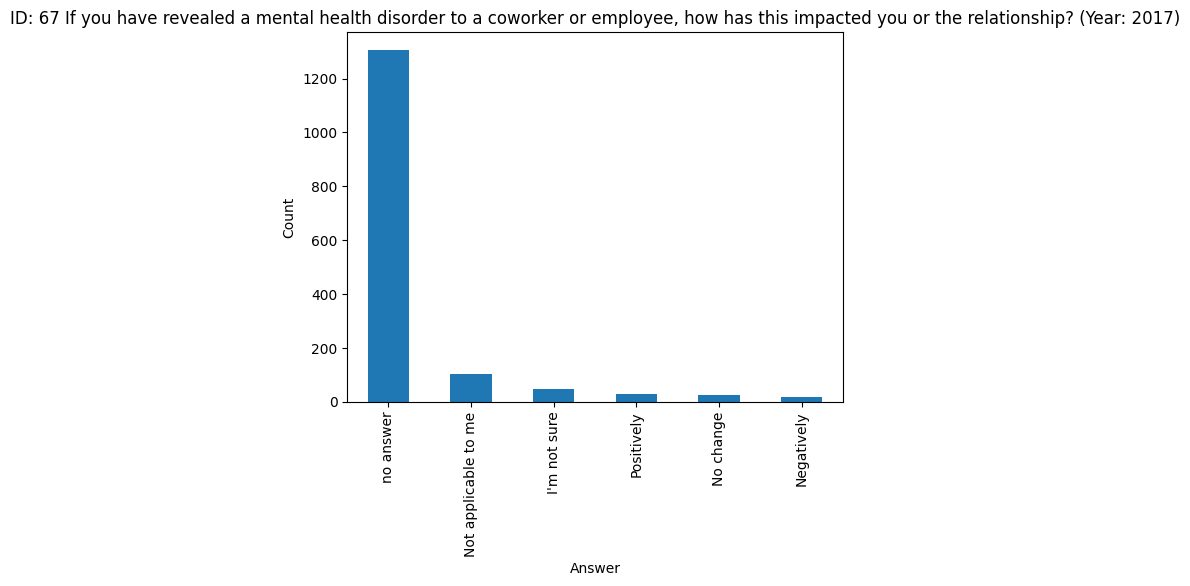

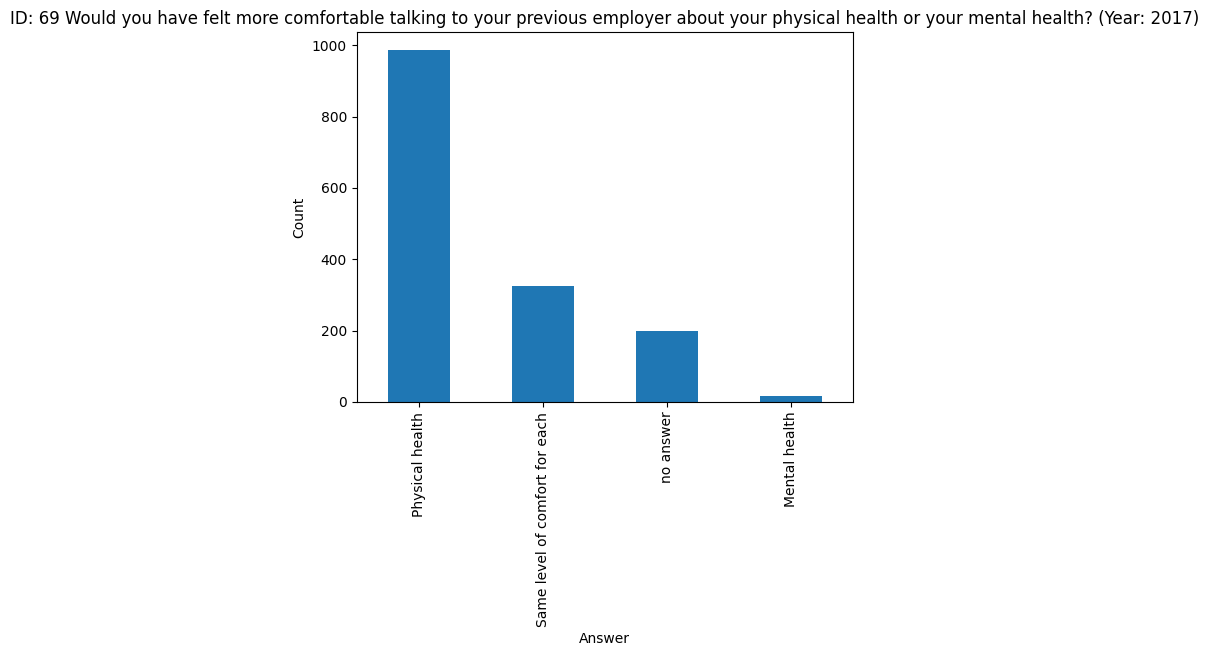

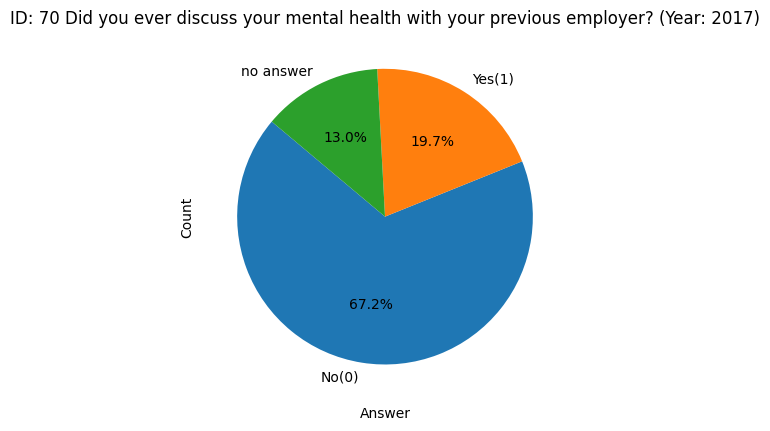

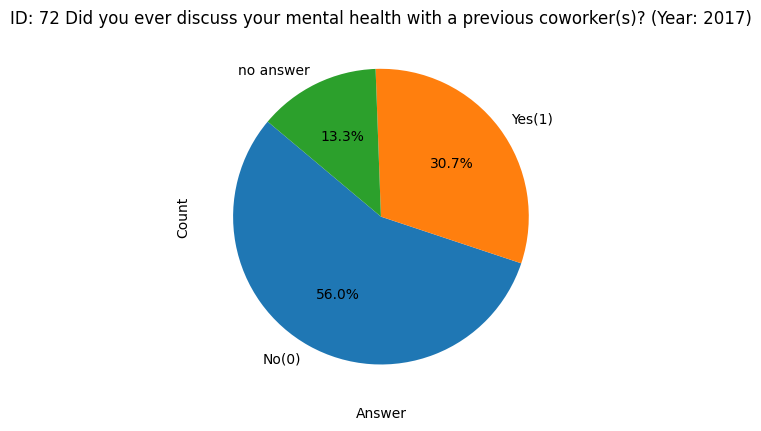

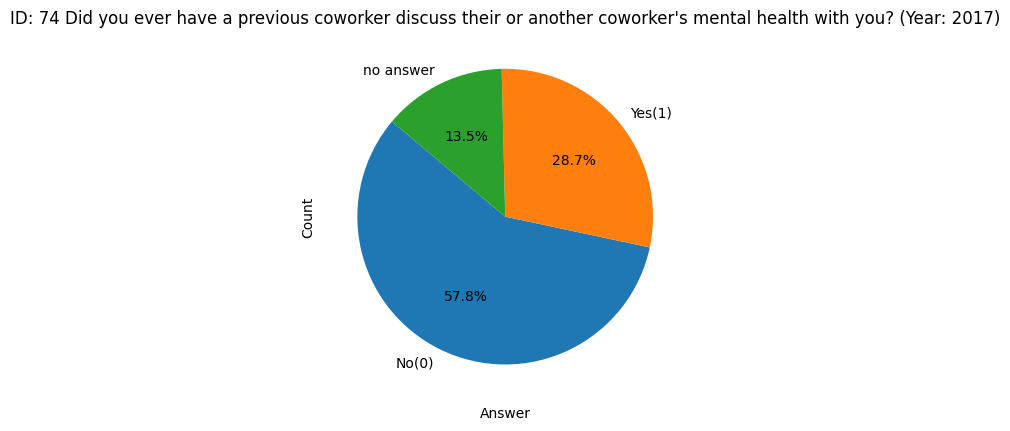

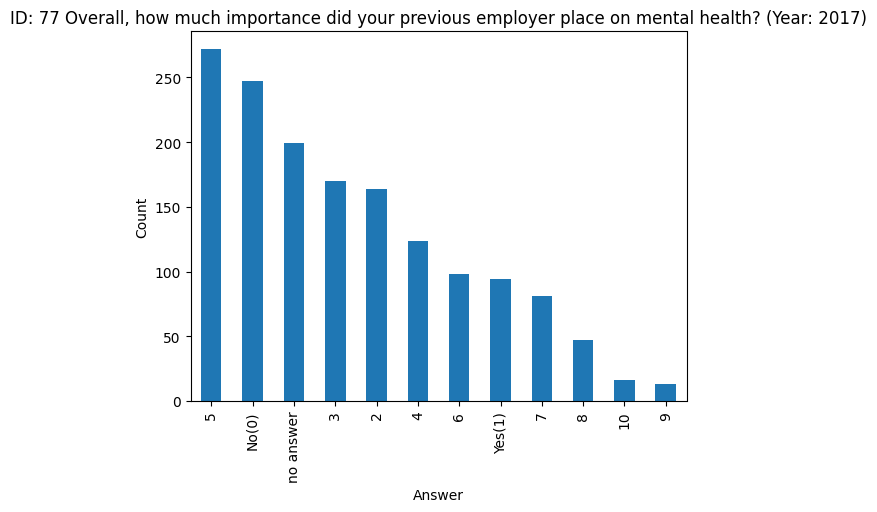

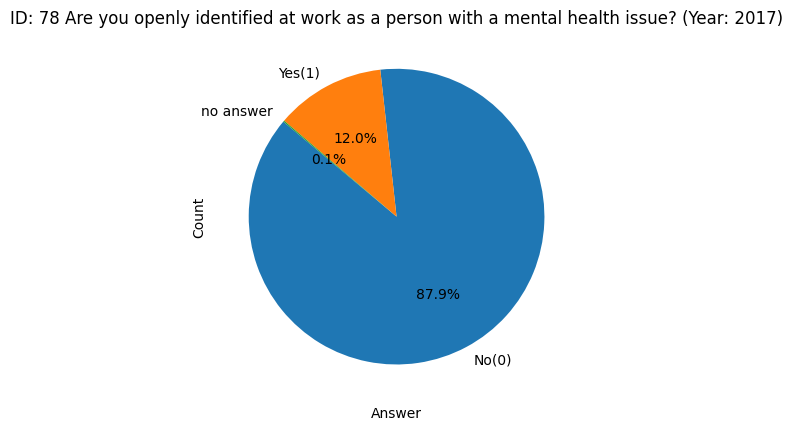

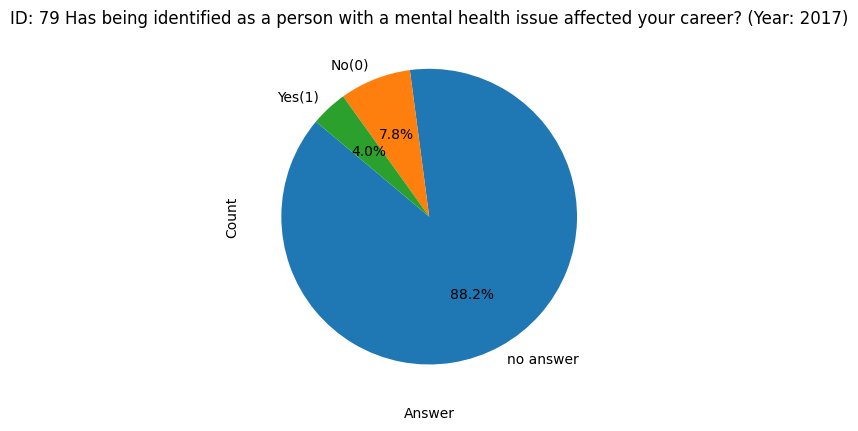

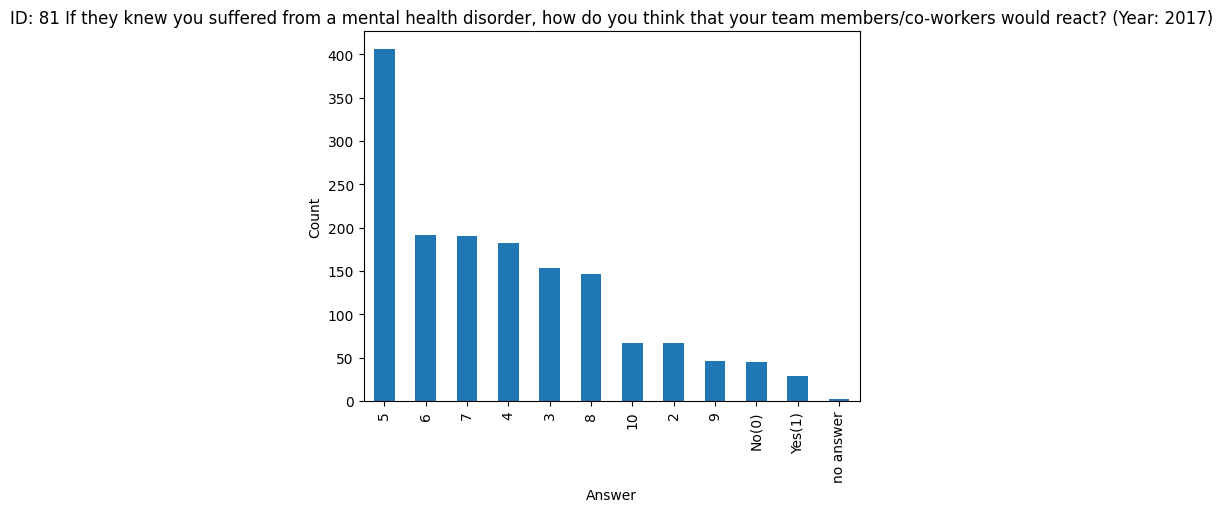

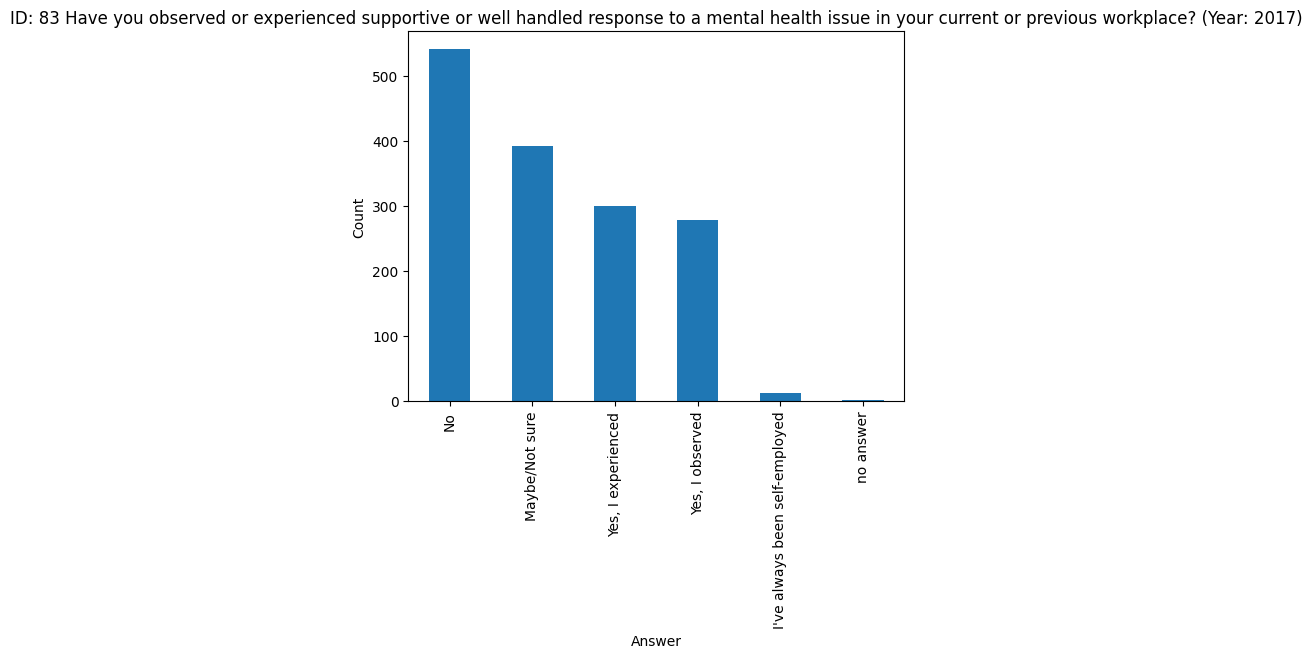

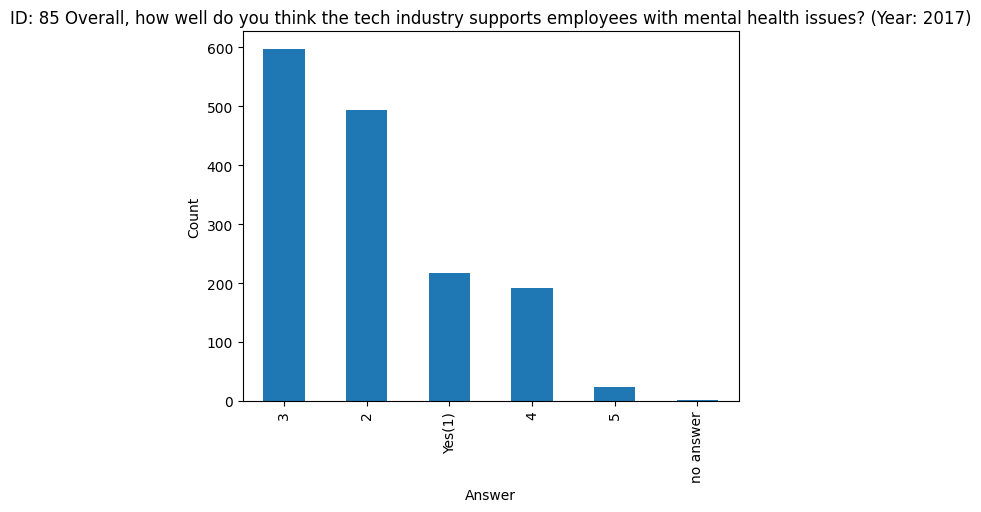

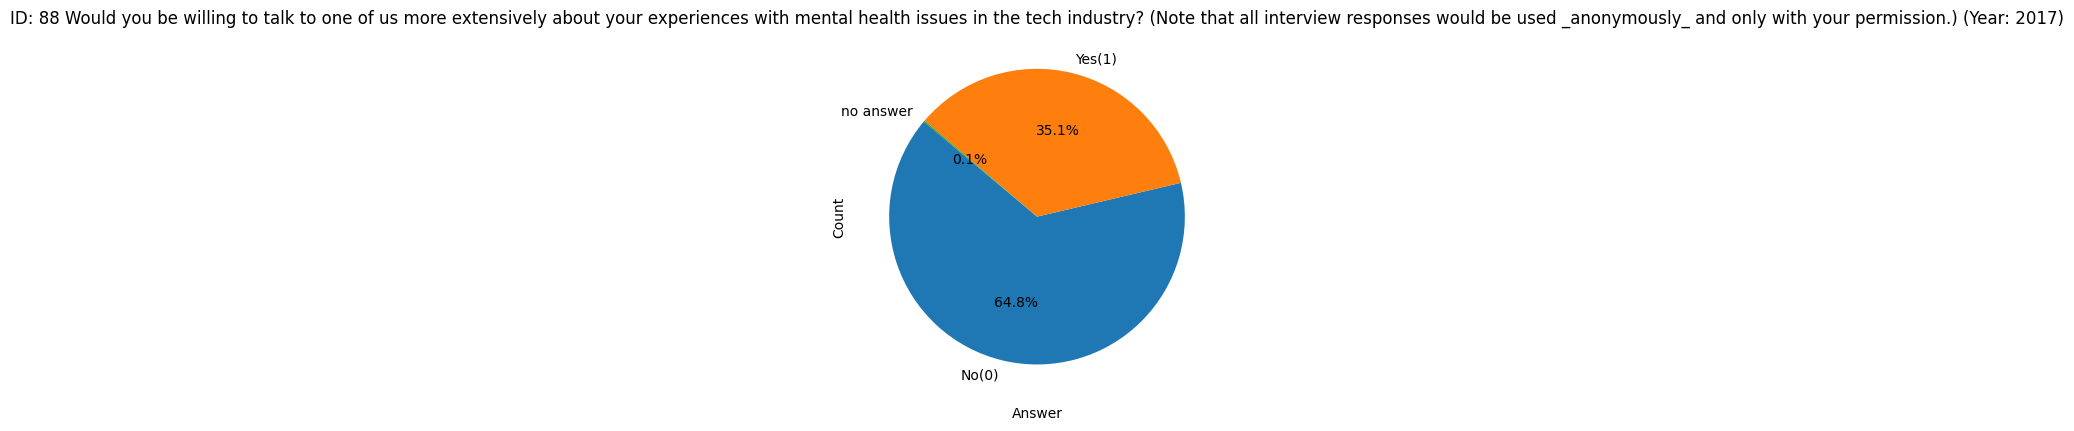

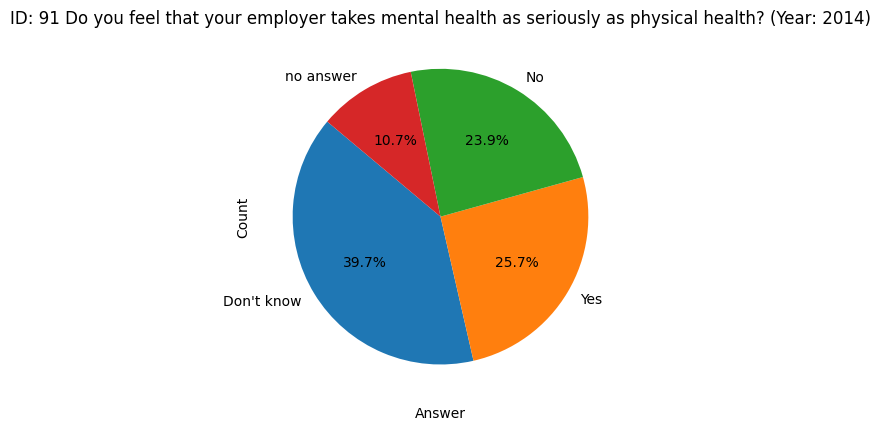

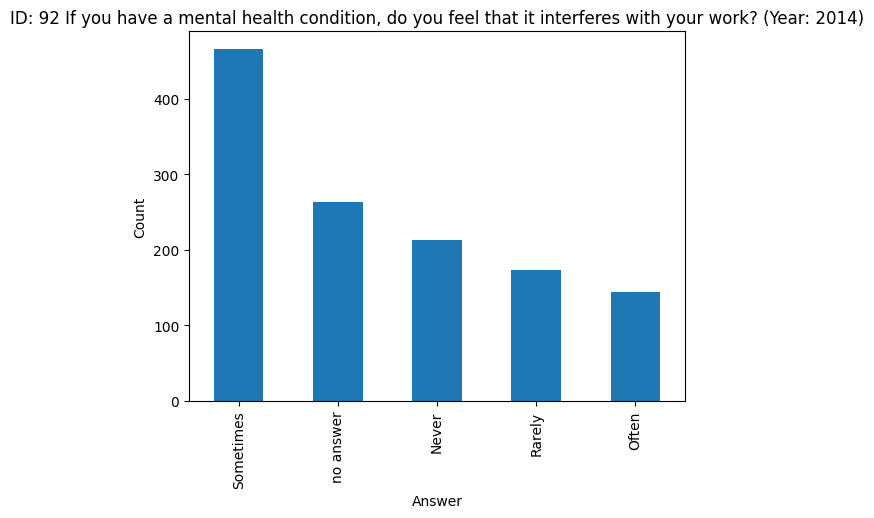

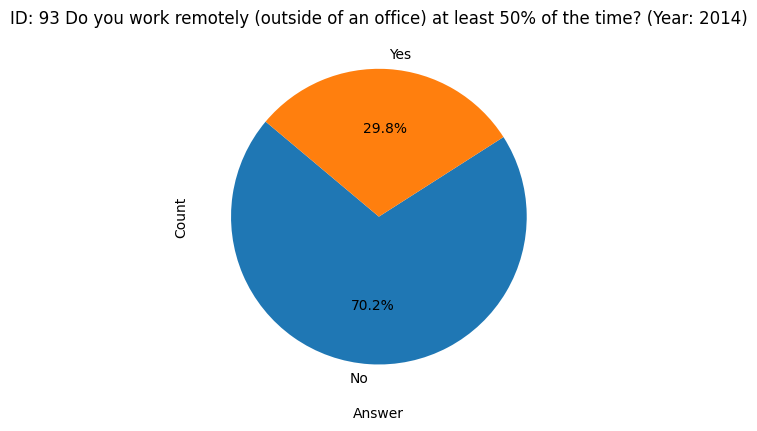

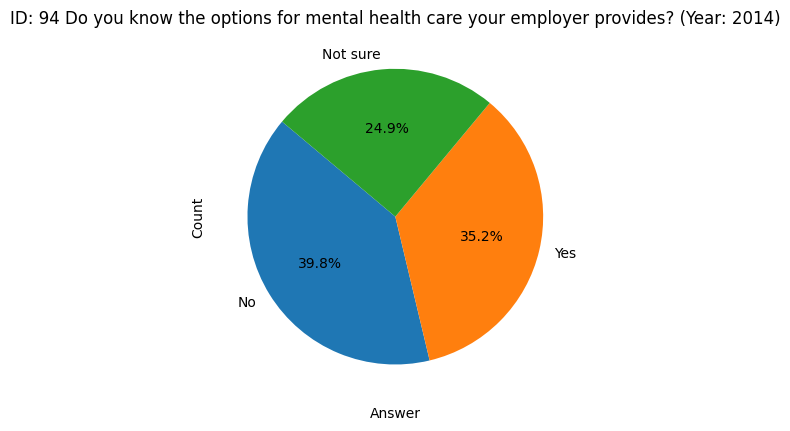

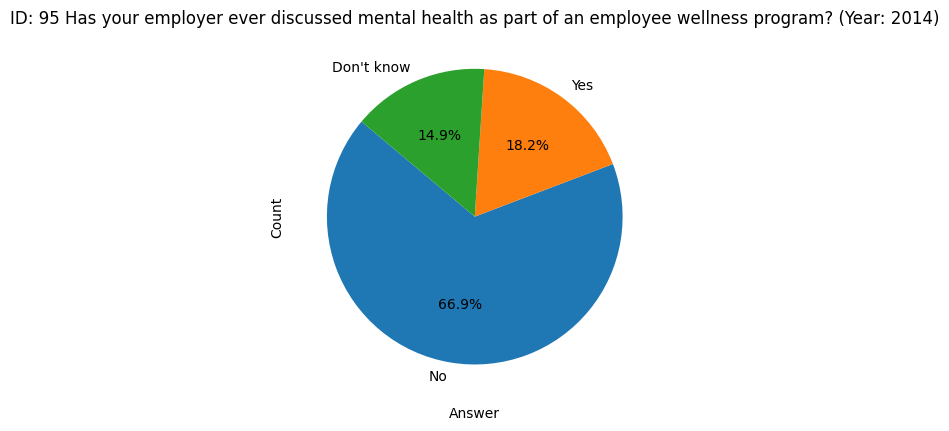

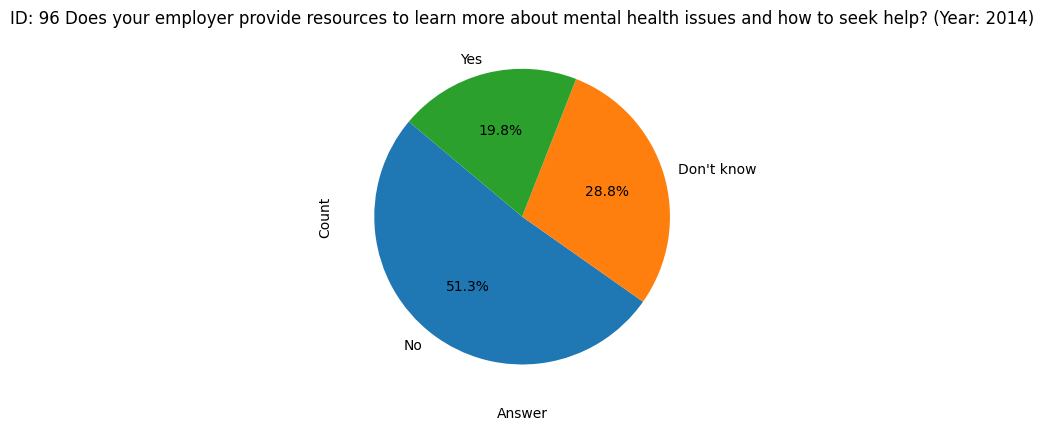

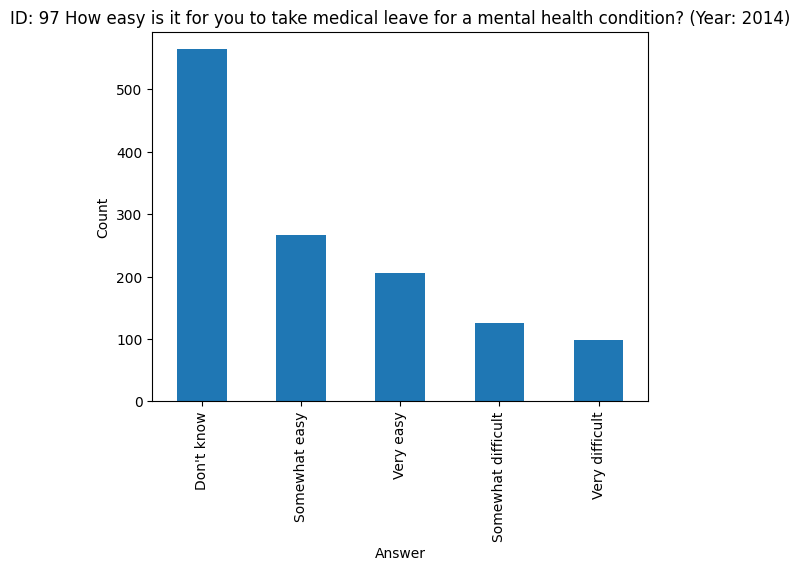

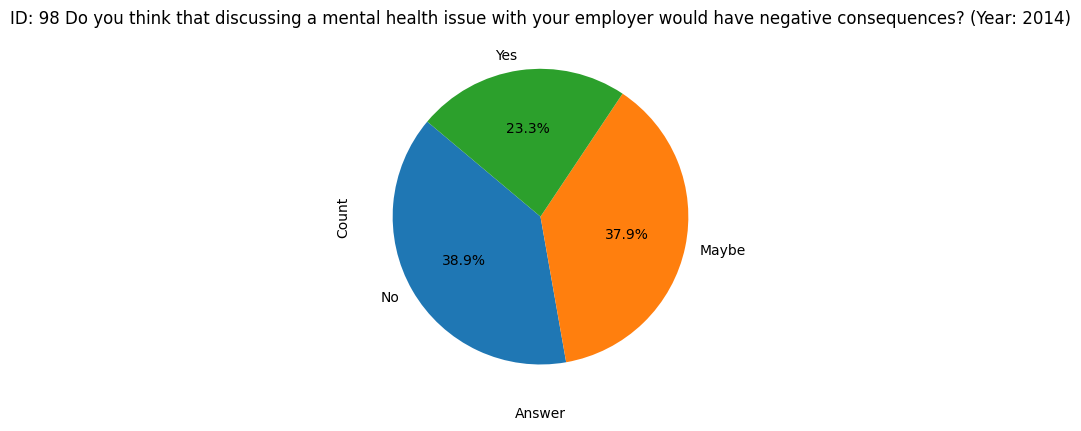

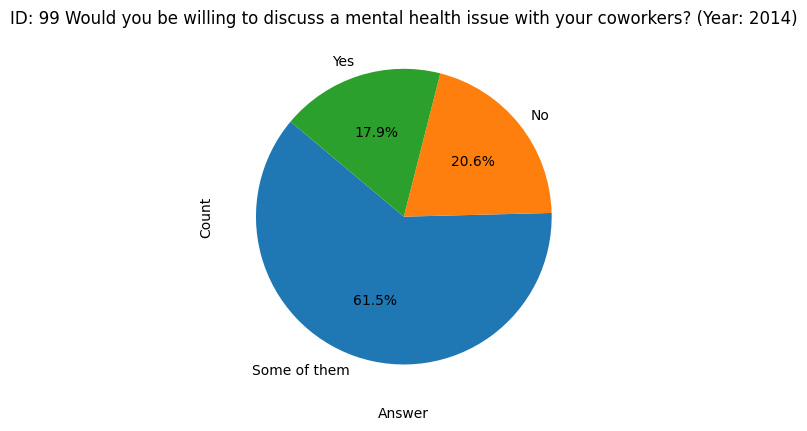

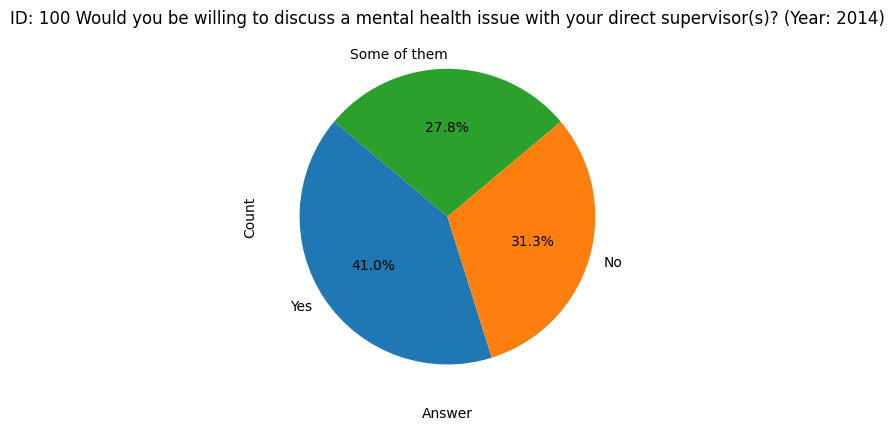

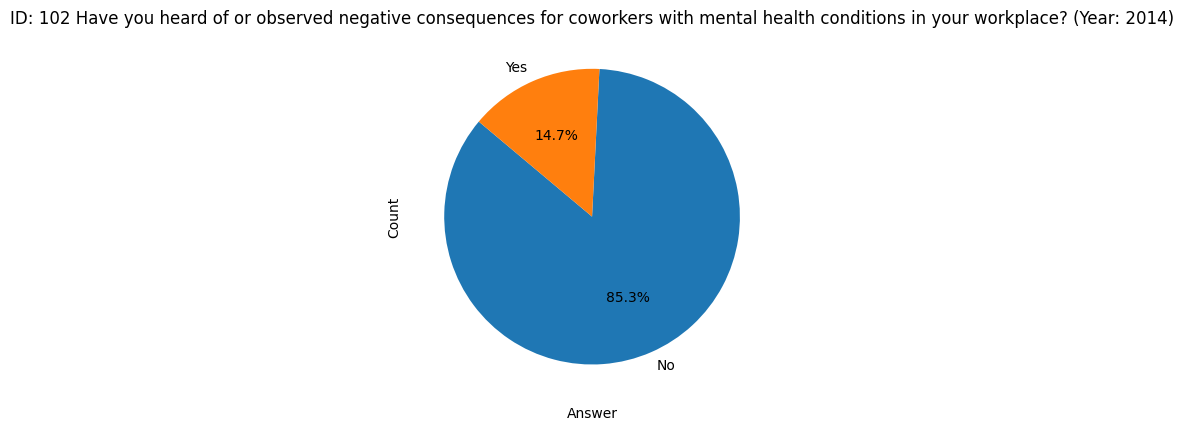

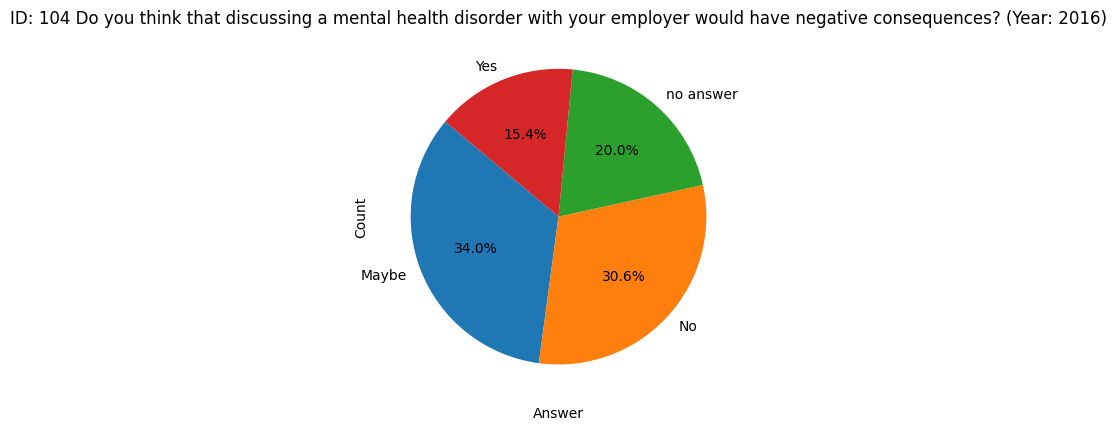

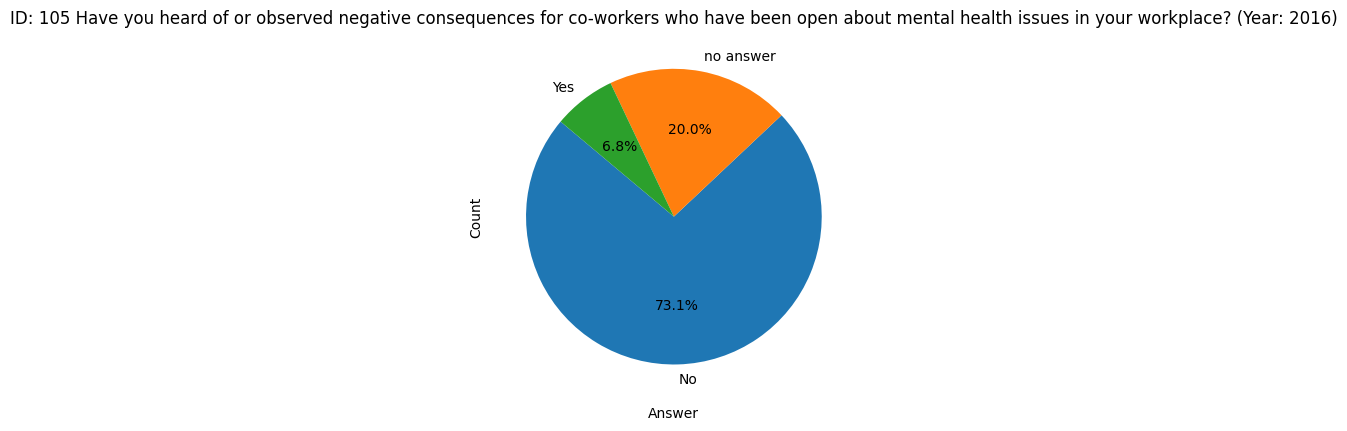

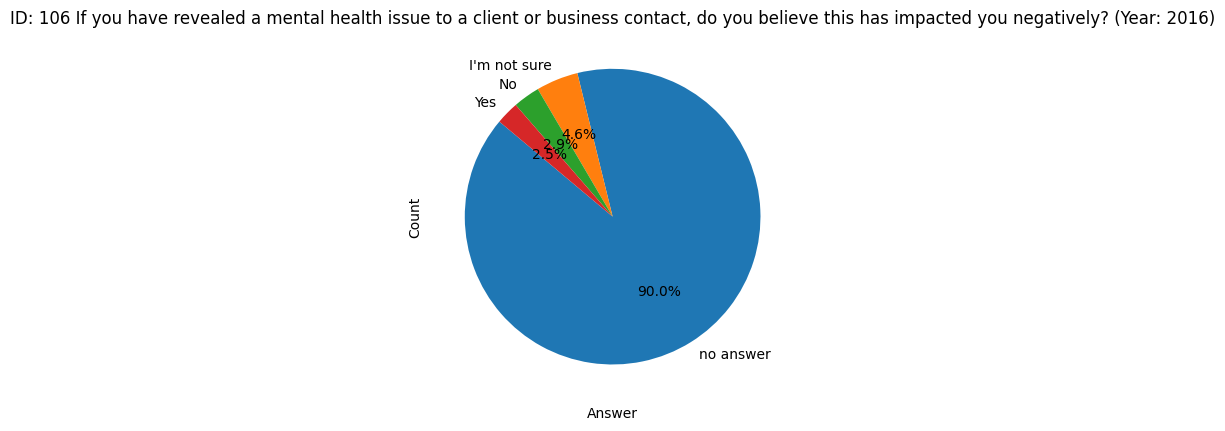

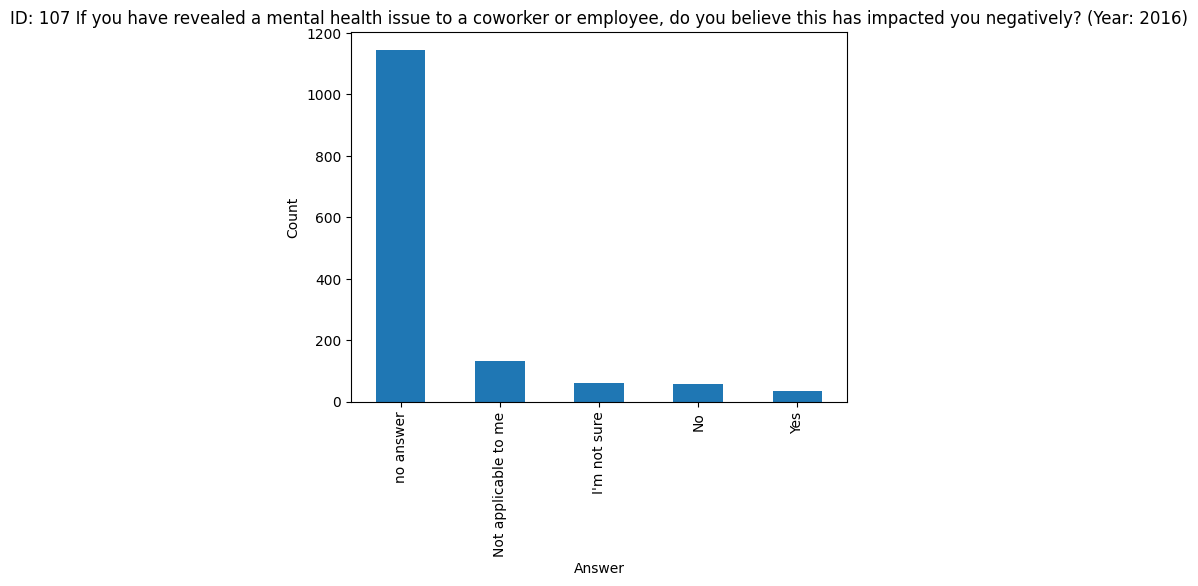

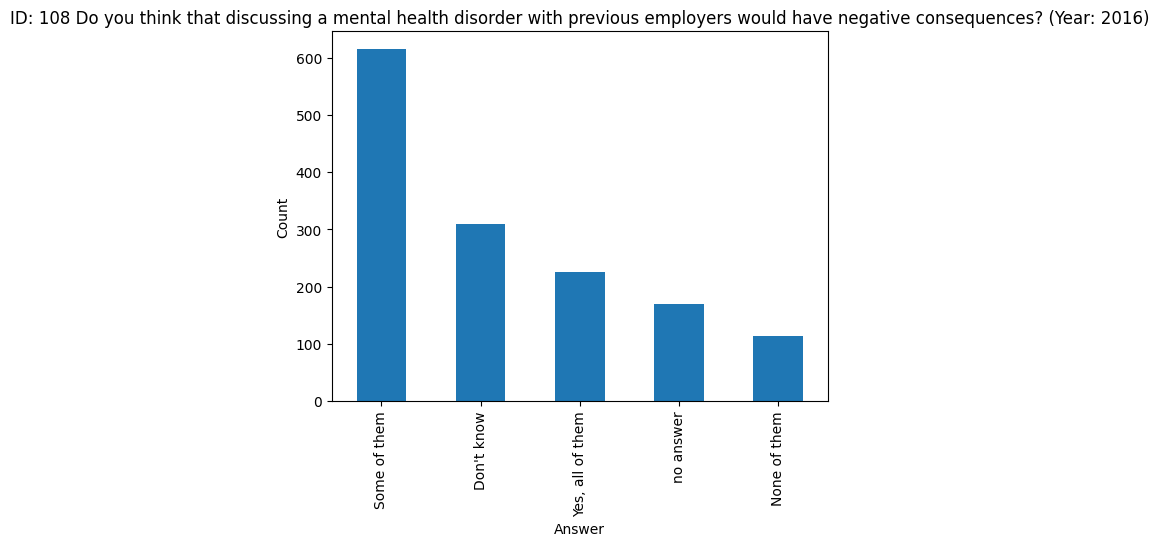

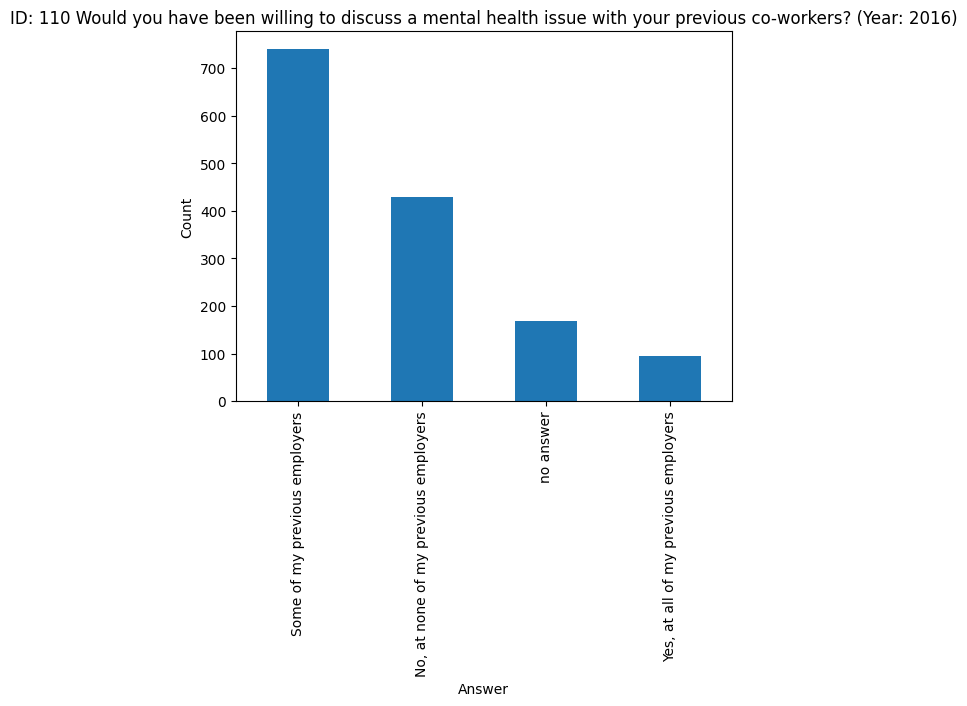

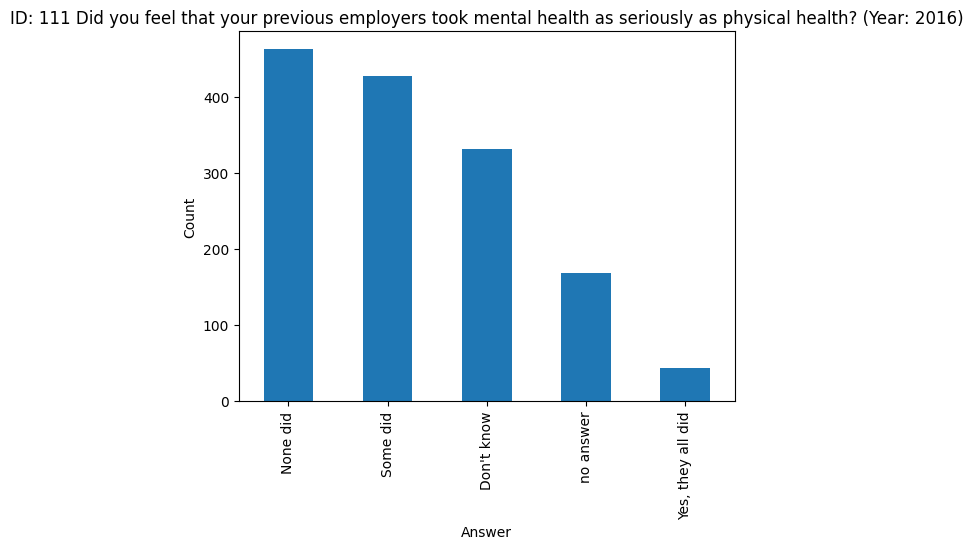

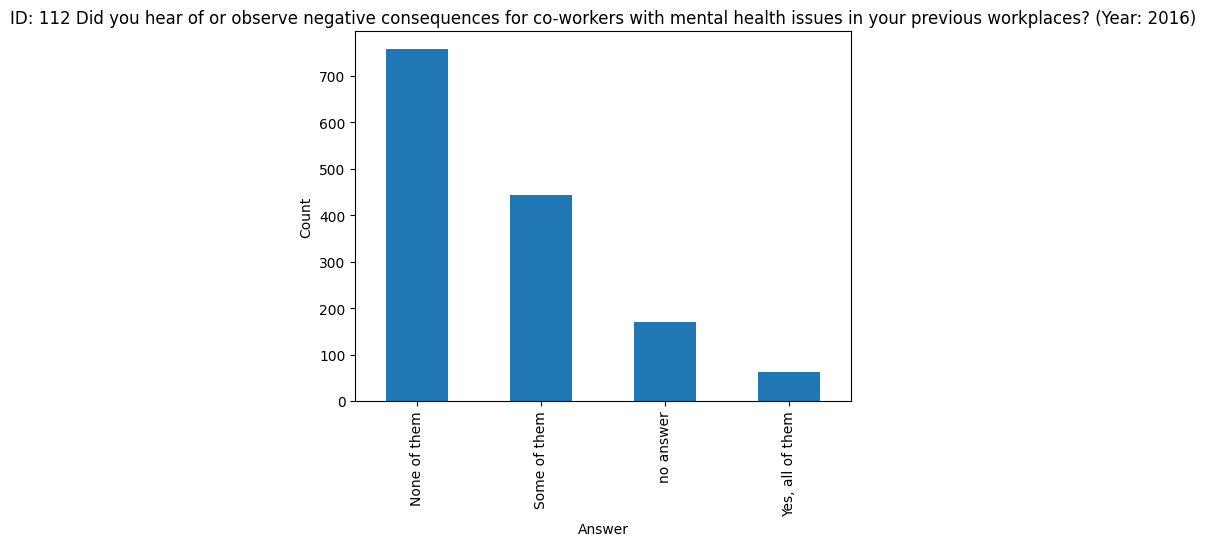

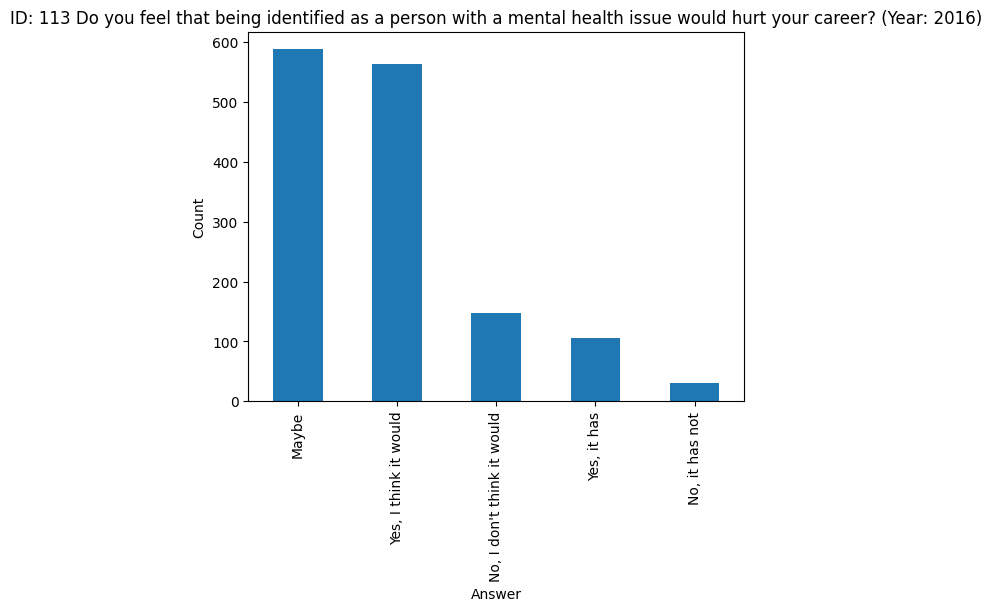

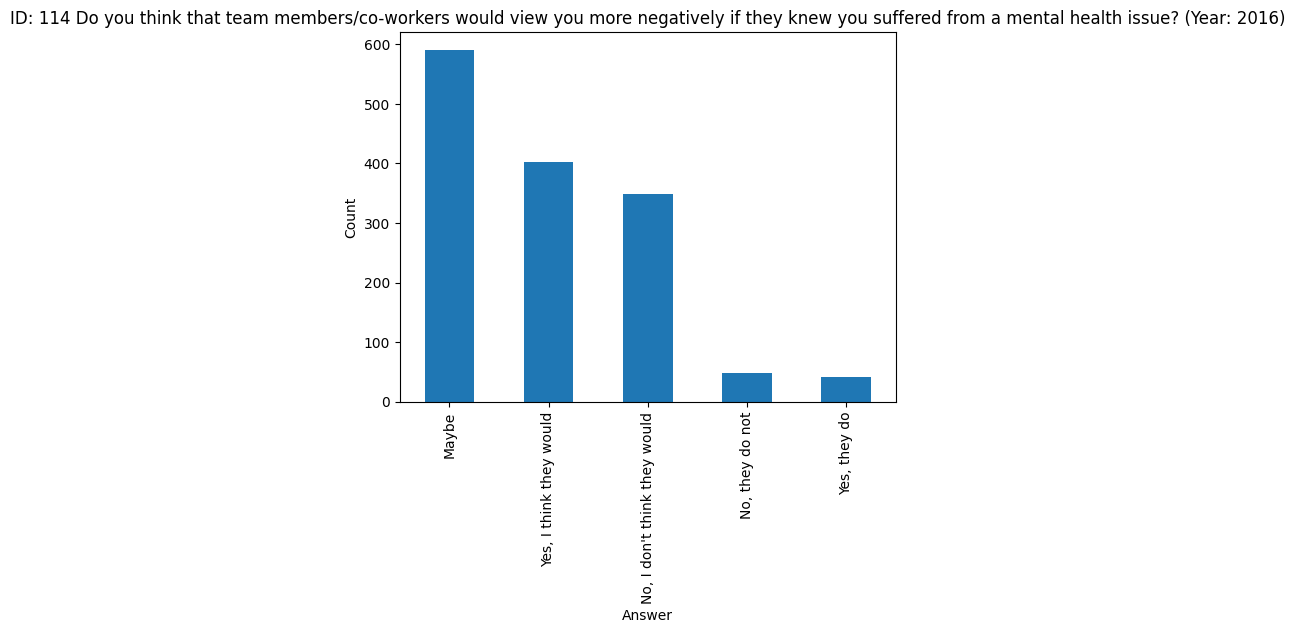

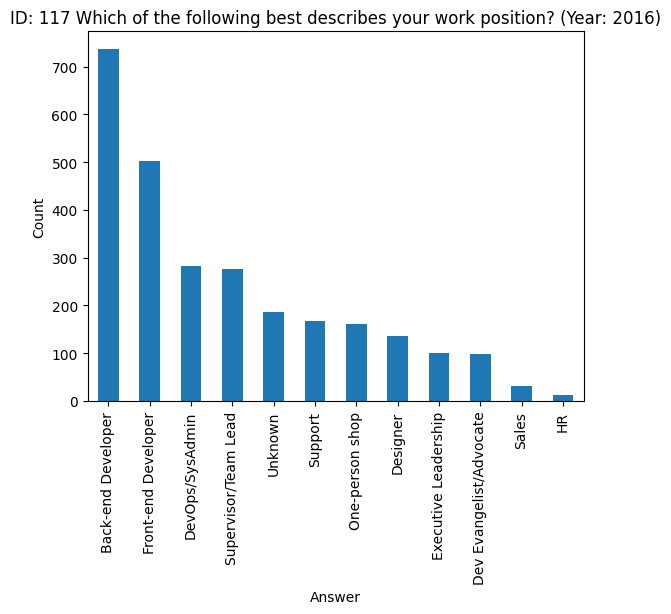

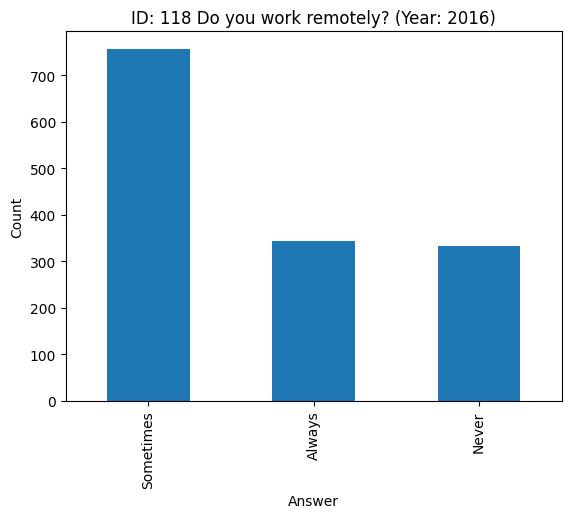

In [22]:
question_ids = [ 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 48, 49, 52, 53, 54, 55, 56, 57, 58, 60, 62, 65, 66, 67, 69, 70, 72,74, 77, 78, 79, 81, 83, 85, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 117, 118]
normalization_mapping = {
    'USA': 'United States',
    'U.S.A': 'United States',
    'united states': 'United States',
    'United states:': 'United States',
    'America': 'United States',
    '-1': 'Unknown',  # Treating '-1' as unknown or unspecified
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'England': 'United Kingdom',  # Assuming 'England' should be grouped under 'United Kingdom'
    'Other': 'Unknown' , # Optionally grouping 'Other' as 'Unknown'
    'Male' : 'male',
    'Female': 'female',
    '1': 'Yes(1)',
    '0': 'No(0)'
}
pieQuestions = [ 7,18,19 20, 34, 58, 60, 62, 70, 72, 74, 78, 79, 88, 91, 93, 94, 95, 96, 98, 99, 100, 102, 104, 105, 106]
specialQ = [59,61,63,71,73,75,86]
for question_id in question_ids:
    df['AnswerText'] = df['AnswerText'].replace(normalization_mapping)


   
    if question_id in pieQuestions:
        df[df['QuestionID'] == question_id]['AnswerText'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    else:
        df[df['QuestionID'] == question_id]['AnswerText'].value_counts().plot(kind='bar')
        plt.xlabel('Answer')
        plt.ylabel('Count')
    #df[df['QuestionID'] == question_id]['AnswerText'].value_counts().plot(kind='bar')
    question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
    year = df[df['QuestionID'] == question_id]['SurveyID'].iloc[0]
    
    plt.title("ID: " + str(question_id) + " " + question_text + " (Year: " + str(year) + ")")
    plt.show()

# for question_id in question_ids:
#     df[df['QuestionID'] == question_id]['AnswerText'].value_counts().plot(kind='bar')
#     question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
#     plt.xlabel('Answer')
#     plt.ylabel('Count')
#     plt.title("ID:"+str(question_id)+" "+question_text)
#     plt.show()



